# Basic Concept

In [4]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict,cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from imblearn.over_sampling import SMOTE
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')

In [5]:
df = pd.read_csv('~/cleaned.csv')

In [6]:
#split dataset into two sets: 1. feature set 2. class
cols=['EmergencyReferral', 'HighRisk', 'Flag_Mix','Flag_E', 'Flag']
X=df.drop(columns=cols)
#class
y=df["Flag"].astype(int)
#X.head()

In [7]:
# detect class imbalance
df["Flag"].value_counts()

0.0    294131
1.0     12588
Name: Flag, dtype: int64

In [8]:
#select the important features as model predictors
cols=['SBP', 'DBP', 'BPAssessment', 'GLU', 'BMI', 'TGS', 'Age', 'TCHOL', 'AST', 'LDL', 'ALT', 'WEIGHT', 'DMAssessment', 'AbdominalCir', 'METS_Risks', 'DiabetesStatusUsingGlucose']
X_feature=X[cols]


In [9]:
# split dataset into testing set and training set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_feature, y, test_size=0.3, random_state=0)

In [10]:
# scale features
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test)

In [11]:
y_train=y_train.values.ravel()
y_train.shape

(214703,)

# Undersample Majority Class

In [12]:
# define a function to undersample original dataset: X= features, y= target, pro=ratio of majority to minority
def undersampling_training_size(X,y,pro):
    rus = RandomUnderSampler(ratio = pro,random_state=0)
    X_resampled, y_resampled = rus.fit_resample(X, y)
    return X_resampled, y_resampled

# Oversample Minority Class

In [13]:
# define a function to overdersample original dataset: X= features, y= target, pro=ratio of majority to minority
def oversampling_training_size(X,y,pro):
    ros = RandomOverSampler(ratio = pro,random_state=0)
    X_resampled, y_resampled = ros.fit_sample(X, y)
    return X_resampled, y_resampled

# SMOTE Oversampling 

In [14]:
def smote_training_size_k(X,y,pro,k):
    smote = SMOTE(ratio = pro,random_state=0, k_neighbors=k)
    X_resampled, y_resampled = smote.fit_sample(X, y)
    return X_resampled, y_resampled

# Classification Model Evaluation Metrics

In [15]:
# define a function to output performance metrics
def ConfusionMatrix_Report(y_test,y_predicted):  
    confusion = confusion_matrix(y_test, y_predicted)
    ACC=accuracy_score(y_test, y_predicted)
    Precision=precision_score(y_test, y_predicted)
    Recall=recall_score(y_test, y_predicted)
    F1=f1_score(y_test, y_predicted)
    print('---Confusion Matrix---\n', confusion)
    print('\n   Accuracy: {:.2f}'.format(ACC))
    print('\n   Precision: {:.2f}'.format(Precision))
    print('\n   Recall: {:.2f}'.format(Recall))
    print('\n   F1: {:.2f}'.format(F1))
    print('---Classification Report---')
    print('\n   \n', 
    classification_report(y_test, y_predicted, target_names = ['not 1', '1']))
    print("Metric ")
    print('% 0.2f' % Recall,'% 0.2f' % F1,'% 0.2f' % Precision,'% 0.2f' % ACC)

In [16]:
#define a function to plot ROC curve for models with decision function
def ROC_decison_function(y_test, y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    print('% 0.2f' %roc_auc)
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr, tpr, lw=3, label='(AUC = {:0.2f})'.format(roc_auc))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('classifier ROC curve )', fontsize=16)
    plt.legend(loc='riht', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

In [17]:
#define a function to plot ROC curve for models without decision function
def ROC_No_decision_function(y_test, clf_predicted):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,clf_predicted)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('% 0.2f' %roc_auc)
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(false_positive_rate, true_positive_rate,lw=3, label='(AUC = {:0.2f})'.format(roc_auc))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('classifier ROC curve )', fontsize=16)
    plt.legend(loc='right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()


# Logistic Regression

In [18]:
def lr_fit(X_resampled, y_resampled,X_test,y_test):
    lr = LogisticRegression()
    clf = lr.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    y_score = lr.decision_function(X_test)
    ROC_decison_function(y_test, y_score)

# Support Vector Machine

In [19]:
def svm_rbf_fit(X_resampled, y_resampled,X_test,y_test):
    svm_rbf = SVC(probability=True)
    clf = svm_rbf.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    y_score = svm_rbf.decision_function(X_test)
    ROC_decison_function(y_test, y_score)

# K Nearest Neighbors

In [20]:
def knn_fit(X_resampled, y_resampled,X_test,y_test):
    knn = KNeighborsClassifier()
    clf = knn.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_No_decision_function(y_test, clf_predicted)

# Decision Tree

In [21]:
def dt_fit(X_resampled, y_resampled,X_test,y_test):
    dt = DecisionTreeClassifier(criterion='gini', max_depth=6)
    clf = dt.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_decison_function(y_test, y_score)

# Random Forest

In [22]:
def forest_fit(X_resampled, y_resampled,X_test,y_test):
    forest = RandomForestClassifier(n_estimators=13,random_state=0,n_jobs=-1)
    clf = forest.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_decison_function(y_test, y_score)

# Gradient Boosted Tree

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
def Gradient_Boosting_fit(X_resampled, y_resampled,X_test,y_test):
    clf = GradientBoostingClassifier().fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_decison_function(y_test, y_score)

# Gaussian Naive Bayes

In [24]:
def nb_fit(X_resampled, y_resampled,X_test,y_test):
    nb = GaussianNB()
    clf = nb.fit(X_resampled, y_resampled)
    clf_predicted = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]
    ConfusionMatrix_Report(y_test=y_test,y_predicted=clf_predicted)
    ROC_decison_function(y_test, y_score)

# Best Undersampling Ratio

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 , the class distribution
[44070  8814]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[84627  3615]
 [ 1619  2155]]

   Accuracy: 0.94

   Precision: 0.37

   Recall: 0.57

   F1: 0.45
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.96      0.97     88242
           1       0.37      0.57      0.45      3774

   micro avg       0.94      0.94      0.94     92016
   macro avg       0.68      0.77      0.71     92016
weighted avg       0.96      0.94      0.95     92016



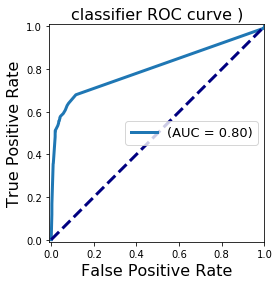

-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[73298 14944]
 [ 1336  2438]]

   Accuracy: 0.82

   Precision: 0.14

   Recall: 0.65

   F1: 0.23
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.83      0.90     88242
           1       0.14      0.65      0.23      3774

   micro avg       0.82      0.82      0.82     92016
   macro avg       0.56      0.74      0.57     92016
weighted avg       0.95      0.82      0.87     92016



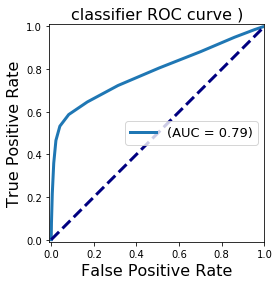

--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[69081 19161]
 [ 1039  2735]]

   Accuracy: 0.78

   Precision: 0.12

   Recall: 0.72

   F1: 0.21
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.78      0.87     88242
           1       0.12      0.72      0.21      3774

   micro avg       0.78      0.78      0.78     92016
   macro avg       0.56      0.75      0.54     92016
weighted avg       0.95      0.78      0.85     92016



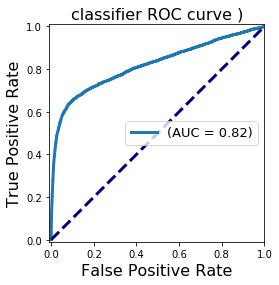

--------------------------------------------Support Vector Machine-------------------------------------
---Confusion Matrix---
 [[80449  7793]
 [ 1309  2465]]

   Accuracy: 0.90

   Precision: 0.24

   Recall: 0.65

   F1: 0.35
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.91      0.95     88242
           1       0.24      0.65      0.35      3774

   micro avg       0.90      0.90      0.90     92016
   macro avg       0.61      0.78      0.65     92016
weighted avg       0.95      0.90      0.92     92016



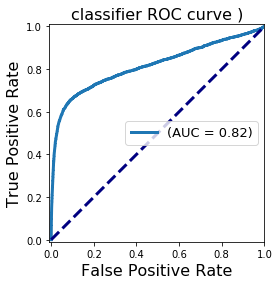

--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[68568 19674]
 [ 1108  2666]]

   Accuracy: 0.77

   Precision: 0.12

   Recall: 0.71

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.78      0.87     88242
           1       0.12      0.71      0.20      3774

   micro avg       0.77      0.77      0.77     92016
   macro avg       0.55      0.74      0.54     92016
weighted avg       0.95      0.77      0.84     92016



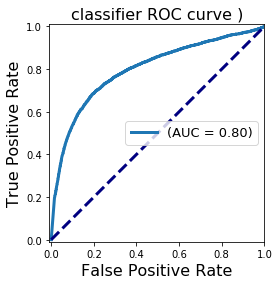

--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[82304  5938]
 [ 1424  2350]]

   Accuracy: 0.92

   Precision: 0.28

   Recall: 0.62

   F1: 0.39
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.93      0.96     88242
           1       0.28      0.62      0.39      3774

   micro avg       0.92      0.92      0.92     92016
   macro avg       0.63      0.78      0.67     92016
weighted avg       0.95      0.92      0.93     92016



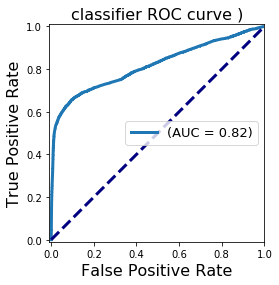

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 , the class distribution
[22035  8814]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[83831  4411]
 [ 1526  2248]]

   Accuracy: 0.94

   Precision: 0.34

   Recall: 0.60

   F1: 0.43
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.95      0.97     88242
           1       0.34      0.60      0.43      3774

   micro avg       0.94      0.94      0.94     92016
   macro avg       0.66      0.77      0.70     92016
weighted avg       0.96      0.94      0.94     92016



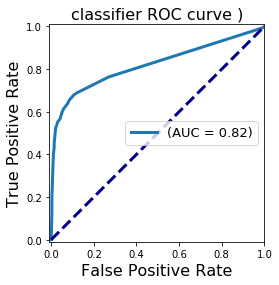

-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[52460 35782]
 [ 1006  2768]]

   Accuracy: 0.60

   Precision: 0.07

   Recall: 0.73

   F1: 0.13
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.59      0.74     88242
           1       0.07      0.73      0.13      3774

   micro avg       0.60      0.60      0.60     92016
   macro avg       0.53      0.66      0.44     92016
weighted avg       0.94      0.60      0.72     92016



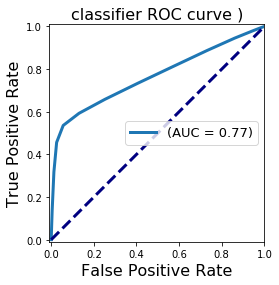

--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[48702 39540]
 [  652  3122]]

   Accuracy: 0.56

   Precision: 0.07

   Recall: 0.83

   F1: 0.13
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.55      0.71     88242
           1       0.07      0.83      0.13      3774

   micro avg       0.56      0.56      0.56     92016
   macro avg       0.53      0.69      0.42     92016
weighted avg       0.95      0.56      0.68     92016



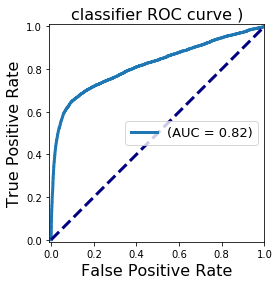

--------------------------------------------Support Vector Machine-------------------------------------
---Confusion Matrix---
 [[75983 12259]
 [ 1136  2638]]

   Accuracy: 0.85

   Precision: 0.18

   Recall: 0.70

   F1: 0.28
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.86      0.92     88242
           1       0.18      0.70      0.28      3774

   micro avg       0.85      0.85      0.85     92016
   macro avg       0.58      0.78      0.60     92016
weighted avg       0.95      0.85      0.89     92016



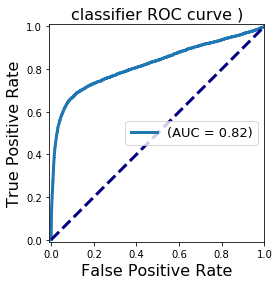

--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[68084 20158]
 [ 1088  2686]]

   Accuracy: 0.77

   Precision: 0.12

   Recall: 0.71

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.77      0.87     88242
           1       0.12      0.71      0.20      3774

   micro avg       0.77      0.77      0.77     92016
   macro avg       0.55      0.74      0.53     92016
weighted avg       0.95      0.77      0.84     92016



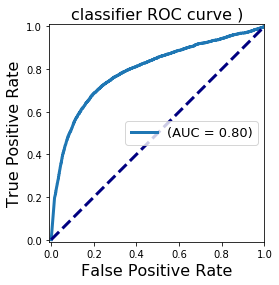

--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[76268 11974]
 [ 1179  2595]]

   Accuracy: 0.86

   Precision: 0.18

   Recall: 0.69

   F1: 0.28
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.86      0.92     88242
           1       0.18      0.69      0.28      3774

   micro avg       0.86      0.86      0.86     92016
   macro avg       0.58      0.78      0.60     92016
weighted avg       0.95      0.86      0.89     92016



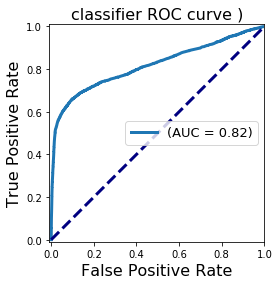

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 , the class distribution
[14690  8814]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[79996  8246]
 [ 1311  2463]]

   Accuracy: 0.90

   Precision: 0.23

   Recall: 0.65

   F1: 0.34
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.91      0.94     88242
           1       0.23      0.65      0.34      3774

   micro avg       0.90      0.90      0.90     92016
   macro avg       0.61      0.78      0.64     92016
weighted avg       0.95      0.90      0.92     92016



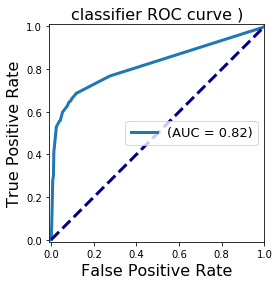

-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[47461 40781]
 [  832  2942]]

   Accuracy: 0.55

   Precision: 0.07

   Recall: 0.78

   F1: 0.12
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.54      0.70     88242
           1       0.07      0.78      0.12      3774

   micro avg       0.55      0.55      0.55     92016
   macro avg       0.53      0.66      0.41     92016
weighted avg       0.95      0.55      0.67     92016



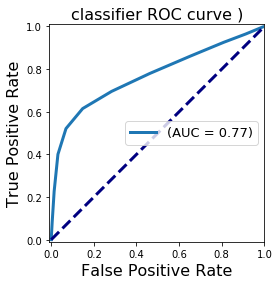

--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[35811 52431]
 [  463  3311]]

   Accuracy: 0.43

   Precision: 0.06

   Recall: 0.88

   F1: 0.11
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.41      0.58     88242
           1       0.06      0.88      0.11      3774

   micro avg       0.43      0.43      0.43     92016
   macro avg       0.52      0.64      0.34     92016
weighted avg       0.95      0.43      0.56     92016



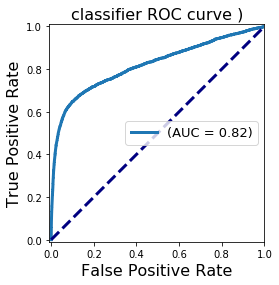

--------------------------------------------Support Vector Machine-------------------------------------
---Confusion Matrix---
 [[73806 14436]
 [ 1067  2707]]

   Accuracy: 0.83

   Precision: 0.16

   Recall: 0.72

   F1: 0.26
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.84      0.90     88242
           1       0.16      0.72      0.26      3774

   micro avg       0.83      0.83      0.83     92016
   macro avg       0.57      0.78      0.58     92016
weighted avg       0.95      0.83      0.88     92016



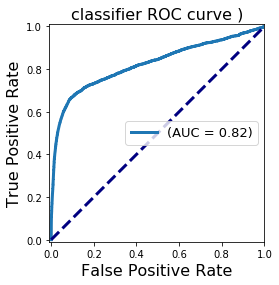

--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[66879 21363]
 [ 1034  2740]]

   Accuracy: 0.76

   Precision: 0.11

   Recall: 0.73

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.76      0.86     88242
           1       0.11      0.73      0.20      3774

   micro avg       0.76      0.76      0.76     92016
   macro avg       0.55      0.74      0.53     92016
weighted avg       0.95      0.76      0.83     92016



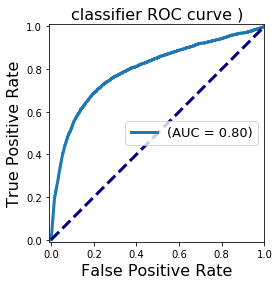

--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[72698 15544]
 [ 1083  2691]]

   Accuracy: 0.82

   Precision: 0.15

   Recall: 0.71

   F1: 0.24
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.82      0.90     88242
           1       0.15      0.71      0.24      3774

   micro avg       0.82      0.82      0.82     92016
   macro avg       0.57      0.77      0.57     92016
weighted avg       0.95      0.82      0.87     92016



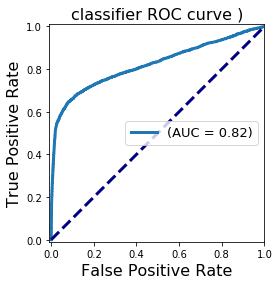

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 , the class distribution
[11017  8814]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[79611  8631]
 [ 1283  2491]]

   Accuracy: 0.89

   Precision: 0.22

   Recall: 0.66

   F1: 0.33
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.90      0.94     88242
           1       0.22      0.66      0.33      3774

   micro avg       0.89      0.89      0.89     92016
   macro avg       0.60      0.78      0.64     92016
weighted avg       0.95      0.89      0.92     92016



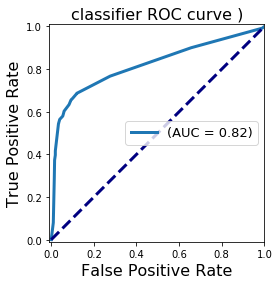

-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[52936 35306]
 [  917  2857]]

   Accuracy: 0.61

   Precision: 0.07

   Recall: 0.76

   F1: 0.14
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.60      0.75     88242
           1       0.07      0.76      0.14      3774

   micro avg       0.61      0.61      0.61     92016
   macro avg       0.53      0.68      0.44     92016
weighted avg       0.95      0.61      0.72     92016



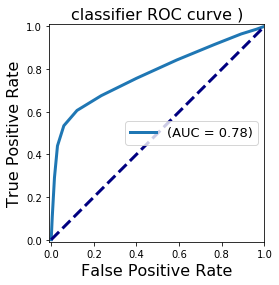

--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[27717 60525]
 [  345  3429]]

   Accuracy: 0.34

   Precision: 0.05

   Recall: 0.91

   F1: 0.10
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.31      0.48     88242
           1       0.05      0.91      0.10      3774

   micro avg       0.34      0.34      0.34     92016
   macro avg       0.52      0.61      0.29     92016
weighted avg       0.95      0.34      0.46     92016



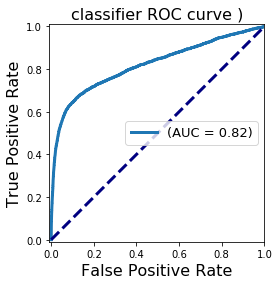

--------------------------------------------Support Vector Machine-------------------------------------
---Confusion Matrix---
 [[71925 16317]
 [ 1035  2739]]

   Accuracy: 0.81

   Precision: 0.14

   Recall: 0.73

   F1: 0.24
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.82      0.89     88242
           1       0.14      0.73      0.24      3774

   micro avg       0.81      0.81      0.81     92016
   macro avg       0.56      0.77      0.57     92016
weighted avg       0.95      0.81      0.87     92016



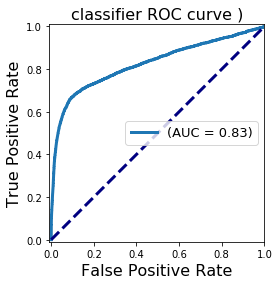

--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[66228 22014]
 [ 1013  2761]]

   Accuracy: 0.75

   Precision: 0.11

   Recall: 0.73

   F1: 0.19
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.75      0.85     88242
           1       0.11      0.73      0.19      3774

   micro avg       0.75      0.75      0.75     92016
   macro avg       0.55      0.74      0.52     92016
weighted avg       0.95      0.75      0.82     92016



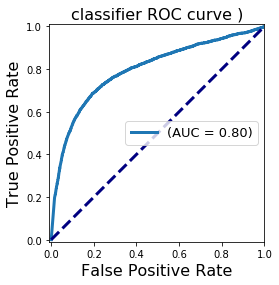

--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[67016 21226]
 [  958  2816]]

   Accuracy: 0.76

   Precision: 0.12

   Recall: 0.75

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.76      0.86     88242
           1       0.12      0.75      0.20      3774

   micro avg       0.76      0.76      0.76     92016
   macro avg       0.55      0.75      0.53     92016
weighted avg       0.95      0.76      0.83     92016



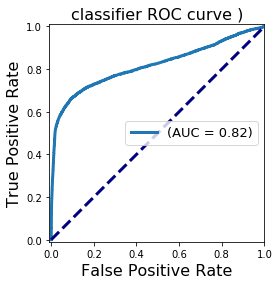

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 , the class distribution
[8814 8814]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[77130 11112]
 [ 1181  2593]]

   Accuracy: 0.87

   Precision: 0.19

   Recall: 0.69

   F1: 0.30
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.87      0.93     88242
           1       0.19      0.69      0.30      3774

   micro avg       0.87      0.87      0.87     92016
   macro avg       0.59      0.78      0.61     92016
weighted avg       0.95      0.87      0.90     92016



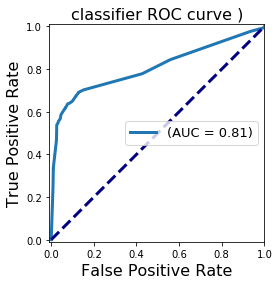

-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[54467 33775]
 [  796  2978]]

   Accuracy: 0.62

   Precision: 0.08

   Recall: 0.79

   F1: 0.15
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.62      0.76     88242
           1       0.08      0.79      0.15      3774

   micro avg       0.62      0.62      0.62     92016
   macro avg       0.53      0.70      0.45     92016
weighted avg       0.95      0.62      0.73     92016



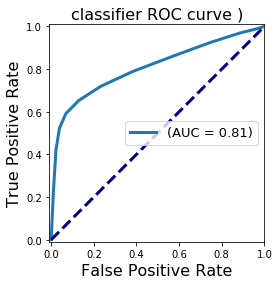

--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[21761 66481]
 [  253  3521]]

   Accuracy: 0.27

   Precision: 0.05

   Recall: 0.93

   F1: 0.10
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.25      0.39     88242
           1       0.05      0.93      0.10      3774

   micro avg       0.27      0.27      0.27     92016
   macro avg       0.52      0.59      0.25     92016
weighted avg       0.95      0.27      0.38     92016



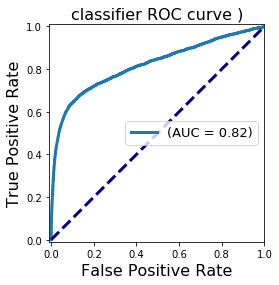

--------------------------------------------Support Vector Machine-------------------------------------
---Confusion Matrix---
 [[69109 19133]
 [  985  2789]]

   Accuracy: 0.78

   Precision: 0.13

   Recall: 0.74

   F1: 0.22
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.78      0.87     88242
           1       0.13      0.74      0.22      3774

   micro avg       0.78      0.78      0.78     92016
   macro avg       0.56      0.76      0.55     92016
weighted avg       0.95      0.78      0.85     92016



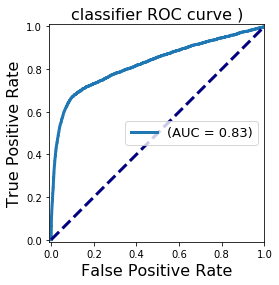

--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[65684 22558]
 [  995  2779]]

   Accuracy: 0.74

   Precision: 0.11

   Recall: 0.74

   F1: 0.19
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.74      0.85     88242
           1       0.11      0.74      0.19      3774

   micro avg       0.74      0.74      0.74     92016
   macro avg       0.55      0.74      0.52     92016
weighted avg       0.95      0.74      0.82     92016



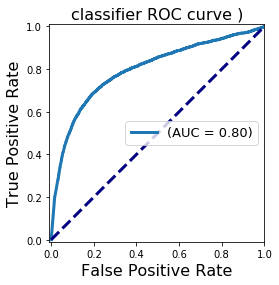

--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[29588 58654]
 [  446  3328]]

   Accuracy: 0.36

   Precision: 0.05

   Recall: 0.88

   F1: 0.10
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.34      0.50     88242
           1       0.05      0.88      0.10      3774

   micro avg       0.36      0.36      0.36     92016
   macro avg       0.52      0.61      0.30     92016
weighted avg       0.95      0.36      0.48     92016



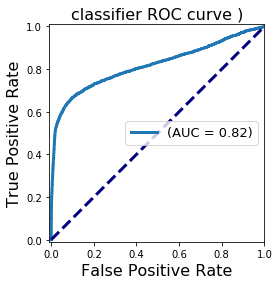

In [34]:
## fit classification models with default hyperparameter setting and different ratios
for i in [0.2,0.4,0.6,0.8,1]:
    print("---------------------------------------------------------------------------------------------------")
    print("When the ratio between the majority and the minority is", i,", the class distribution")
    X_resampled, y_resampled=undersampling_training_size(X=X_train,y=y_train,pro=i)
    print(np.bincount(y_resampled.astype(int)))
    print("-------------------------------------------Decision Tree--------------------------------------------")
    dt_fit(X_resampled, y_resampled,X_test,y_test)
    print("-------------------------------------------Random Forest--------------------------------------------")
    forest_fit(X_resampled, y_resampled,X_test,y_test)
    print("--------------------------------------------Logistic Regression---------------------------------------")
    lr_fit(X_resampled, y_resampled,X_test,y_test)
    print("--------------------------------------------Support Vector Machine-------------------------------------")
    svm_rbf_fit(X_resampled, y_resampled,X_test,y_test)
    print("--------------------------------------------Gaussian Naive Bayes-------------------------------------")
    nb_fit(X_resampled, y_resampled,X_test,y_test)
    print("--------------------------------------------Gradient-Boosted Tree-------------------------------------")
    Gradient_Boosting_fit(X_resampled, y_resampled,X_test,y_test)

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 , the class distribution
[44070  8814]
-------------------------------------------KNN--------------------------------------------
---Confusion Matrix---
 [[83340  4902]
 [ 1744  2030]]

   Accuracy: 0.93

   Precision: 0.29

   Recall: 0.54

   F1: 0.38
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.94      0.96     88242
           1       0.29      0.54      0.38      3774

   micro avg       0.93      0.93      0.93     92016
   macro avg       0.64      0.74      0.67     92016
weighted avg       0.95      0.93      0.94     92016

Metric 
 0.54  0.38  0.29  0.93
 0.74


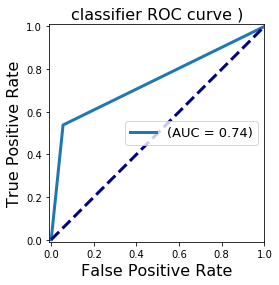

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 , the class distribution
[22035  8814]
-------------------------------------------KNN--------------------------------------------
---Confusion Matrix---
 [[78748  9494]
 [ 1440  2334]]

   Accuracy: 0.88

   Precision: 0.20

   Recall: 0.62

   F1: 0.30
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.89      0.94     88242
           1       0.20      0.62      0.30      3774

   micro avg       0.88      0.88      0.88     92016
   macro avg       0.59      0.76      0.62     92016
weighted avg       0.95      0.88      0.91     92016

Metric 
 0.62  0.30  0.20  0.88
 0.76


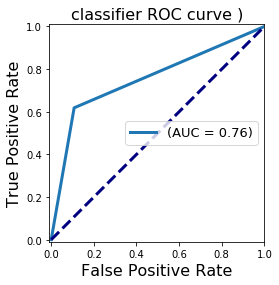

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 , the class distribution
[14690  8814]
-------------------------------------------KNN--------------------------------------------
---Confusion Matrix---
 [[72974 15268]
 [ 1232  2542]]

   Accuracy: 0.82

   Precision: 0.14

   Recall: 0.67

   F1: 0.24
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.83      0.90     88242
           1       0.14      0.67      0.24      3774

   micro avg       0.82      0.82      0.82     92016
   macro avg       0.56      0.75      0.57     92016
weighted avg       0.95      0.82      0.87     92016

Metric 
 0.67  0.24  0.14  0.82
 0.75


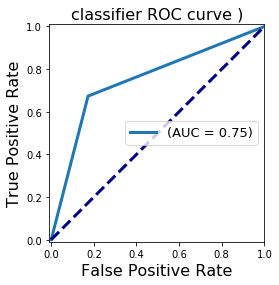

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 , the class distribution
[11017  8814]
-------------------------------------------KNN--------------------------------------------
---Confusion Matrix---
 [[67989 20253]
 [ 1105  2669]]

   Accuracy: 0.77

   Precision: 0.12

   Recall: 0.71

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.77      0.86     88242
           1       0.12      0.71      0.20      3774

   micro avg       0.77      0.77      0.77     92016
   macro avg       0.55      0.74      0.53     92016
weighted avg       0.95      0.77      0.84     92016

Metric 
 0.71  0.20  0.12  0.77
 0.74


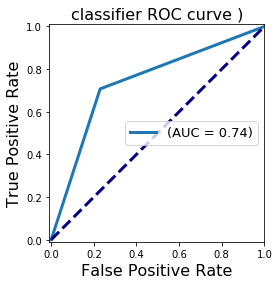

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 , the class distribution
[8814 8814]
-------------------------------------------KNN--------------------------------------------
---Confusion Matrix---
 [[62572 25670]
 [  960  2814]]

   Accuracy: 0.71

   Precision: 0.10

   Recall: 0.75

   F1: 0.17
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.71      0.82     88242
           1       0.10      0.75      0.17      3774

   micro avg       0.71      0.71      0.71     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.71      0.80     92016

Metric 
 0.75  0.17  0.10  0.71
 0.73


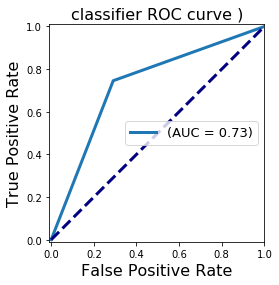

In [25]:
## fit KNN with default hyperparameter setting and different ratios
for i in [0.2,0.4,0.6,0.8,1]:
    print("---------------------------------------------------------------------------------------------------")
    print("When the ratio between the majority and the minority is", i,", the class distribution")
    X_resampled, y_resampled=undersampling_training_size(X=X_train,y=y_train,pro=i)
    print(np.bincount(y_resampled.astype(int)))
    print("-------------------------------------------KNN--------------------------------------------")
    knn_fit(X_resampled, y_resampled,X_test,y_test)

# Best Oversampling Ratio


---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 , the class distribution
[205889  41177]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[85157  3085]
 [ 1679  2095]]

   Accuracy: 0.95

   Precision: 0.40

   Recall: 0.56

   F1: 0.47
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.97      0.97     88242
           1       0.40      0.56      0.47      3774

   micro avg       0.95      0.95      0.95     92016
   macro avg       0.69      0.76      0.72     92016
weighted avg       0.96      0.95      0.95     92016



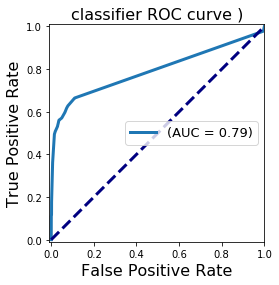

-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[86771  1471]
 [ 2157  1617]]

   Accuracy: 0.96

   Precision: 0.52

   Recall: 0.43

   F1: 0.47
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.98      0.98     88242
           1       0.52      0.43      0.47      3774

   micro avg       0.96      0.96      0.96     92016
   macro avg       0.75      0.71      0.73     92016
weighted avg       0.96      0.96      0.96     92016



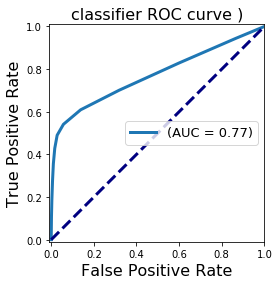

--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[67747 20495]
 [ 1012  2762]]

   Accuracy: 0.77

   Precision: 0.12

   Recall: 0.73

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.77      0.86     88242
           1       0.12      0.73      0.20      3774

   micro avg       0.77      0.77      0.77     92016
   macro avg       0.55      0.75      0.53     92016
weighted avg       0.95      0.77      0.84     92016



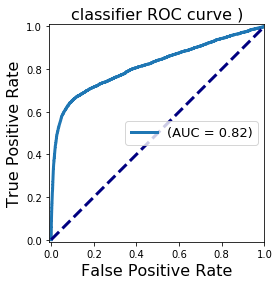

--------------------------------------------Support Vector Machine-------------------------------------
---Confusion Matrix---
 [[79617  8625]
 [ 1282  2492]]

   Accuracy: 0.89

   Precision: 0.22

   Recall: 0.66

   F1: 0.33
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.90      0.94     88242
           1       0.22      0.66      0.33      3774

   micro avg       0.89      0.89      0.89     92016
   macro avg       0.60      0.78      0.64     92016
weighted avg       0.95      0.89      0.92     92016



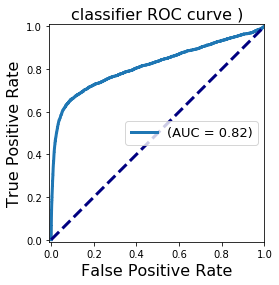

--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[67406 20836]
 [ 1060  2714]]

   Accuracy: 0.76

   Precision: 0.12

   Recall: 0.72

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.76      0.86     88242
           1       0.12      0.72      0.20      3774

   micro avg       0.76      0.76      0.76     92016
   macro avg       0.55      0.74      0.53     92016
weighted avg       0.95      0.76      0.83     92016



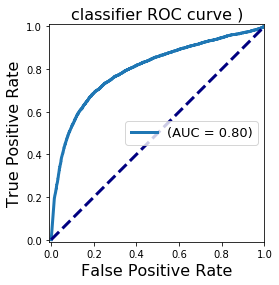

--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[83724  4518]
 [ 1499  2275]]

   Accuracy: 0.93

   Precision: 0.33

   Recall: 0.60

   F1: 0.43
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.95      0.97     88242
           1       0.33      0.60      0.43      3774

   micro avg       0.93      0.93      0.93     92016
   macro avg       0.66      0.78      0.70     92016
weighted avg       0.96      0.93      0.94     92016



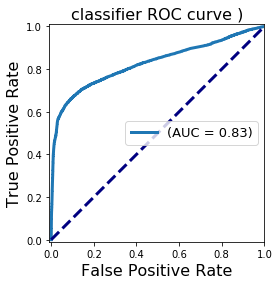

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 , the class distribution
[205889  82355]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[83120  5122]
 [ 1574  2200]]

   Accuracy: 0.93

   Precision: 0.30

   Recall: 0.58

   F1: 0.40
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.94      0.96     88242
           1       0.30      0.58      0.40      3774

   micro avg       0.93      0.93      0.93     92016
   macro avg       0.64      0.76      0.68     92016
weighted avg       0.95      0.93      0.94     92016



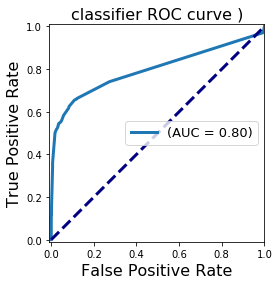

-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[87163  1079]
 [ 2285  1489]]

   Accuracy: 0.96

   Precision: 0.58

   Recall: 0.39

   F1: 0.47
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.97      0.99      0.98     88242
           1       0.58      0.39      0.47      3774

   micro avg       0.96      0.96      0.96     92016
   macro avg       0.78      0.69      0.73     92016
weighted avg       0.96      0.96      0.96     92016



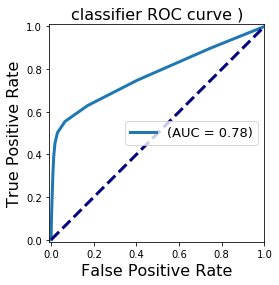

--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[46787 41455]
 [  642  3132]]

   Accuracy: 0.54

   Precision: 0.07

   Recall: 0.83

   F1: 0.13
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.53      0.69     88242
           1       0.07      0.83      0.13      3774

   micro avg       0.54      0.54      0.54     92016
   macro avg       0.53      0.68      0.41     92016
weighted avg       0.95      0.54      0.67     92016



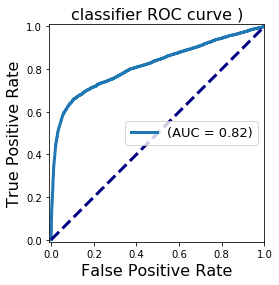

--------------------------------------------Support Vector Machine-------------------------------------


In [ ]:
# Fit Oversampling Minority Classification Model
for i in [0.2,0.4,0.6,0.8,1]:
    print("---------------------------------------------------------------------------------------------------")
    print("When the ratio between the majority and the minority is", i,", the class distribution")
    X_resampled, y_resampled=oversampling_training_size(X=X_train,y=y_train,pro=i)
    print(np.bincount(y_resampled.astype(int)))
    print("-------------------------------------------Decision Tree--------------------------------------------")
    dt_fit(X_resampled, y_resampled,X_test,y_test)
    print("-------------------------------------------Random Forest--------------------------------------------")
    forest_fit(X_resampled, y_resampled,X_test,y_test)
    print("--------------------------------------------Logistic Regression---------------------------------------")
    lr_fit(X_resampled, y_resampled,X_test,y_test)
    print("--------------------------------------------Support Vector Machine-------------------------------------")
    svm_rbf_fit(X_resampled, y_resampled,X_test,y_test)
    print("--------------------------------------------Gaussian Naive Bayes-------------------------------------")
    nb_fit(X_resampled, y_resampled,X_test,y_test)
    print("--------------------------------------------Gradient-Boosted Tree-------------------------------------")
    Gradient_Boosting_fit(X_resampled, y_resampled,X_test,y_test)

# Oversampling Decision Tree

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 , the class distribution
[205889  41177]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[85157  3085]
 [ 1681  2093]]

   Accuracy: 0.95

   Precision: 0.40

   Recall: 0.55

   F1: 0.47
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.97      0.97     88242
           1       0.40      0.55      0.47      3774

   micro avg       0.95      0.95      0.95     92016
   macro avg       0.69      0.76      0.72     92016
weighted avg       0.96      0.95      0.95     92016



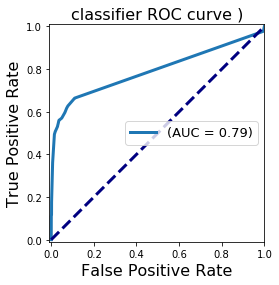

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 , the class distribution
[205889  82355]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[83120  5122]
 [ 1574  2200]]

   Accuracy: 0.93

   Precision: 0.30

   Recall: 0.58

   F1: 0.40
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.94      0.96     88242
           1       0.30      0.58      0.40      3774

   micro avg       0.93      0.93      0.93     92016
   macro avg       0.64      0.76      0.68     92016
weighted avg       0.95      0.93      0.94     92016



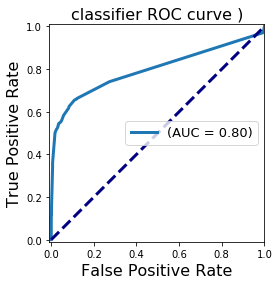

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 , the class distribution
[205889 123533]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[80705  7537]
 [ 1393  2381]]

   Accuracy: 0.90

   Precision: 0.24

   Recall: 0.63

   F1: 0.35
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.91      0.95     88242
           1       0.24      0.63      0.35      3774

   micro avg       0.90      0.90      0.90     92016
   macro avg       0.61      0.77      0.65     92016
weighted avg       0.95      0.90      0.92     92016



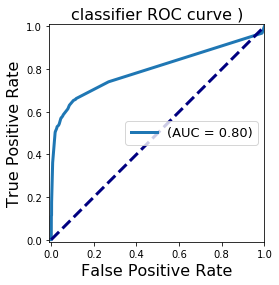

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 , the class distribution
[205889 164711]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[80603  7639]
 [ 1431  2343]]

   Accuracy: 0.90

   Precision: 0.23

   Recall: 0.62

   F1: 0.34
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.91      0.95     88242
           1       0.23      0.62      0.34      3774

   micro avg       0.90      0.90      0.90     92016
   macro avg       0.61      0.77      0.64     92016
weighted avg       0.95      0.90      0.92     92016



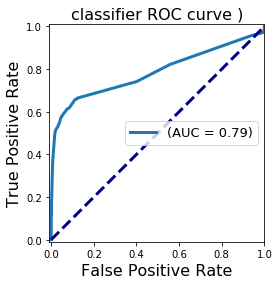

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 , the class distribution
[205889 205889]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[79076  9166]
 [ 1305  2469]]

   Accuracy: 0.89

   Precision: 0.21

   Recall: 0.65

   F1: 0.32
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.90      0.94     88242
           1       0.21      0.65      0.32      3774

   micro avg       0.89      0.89      0.89     92016
   macro avg       0.60      0.78      0.63     92016
weighted avg       0.95      0.89      0.91     92016



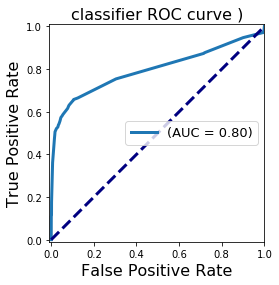

In [26]:
for i in [0.2,0.4,0.6,0.8,1]:
    print("---------------------------------------------------------------------------------------------------")
    print("When the ratio between the majority and the minority is", i,", the class distribution")
    X_resampled, y_resampled=oversampling_training_size(X=X_train,y=y_train,pro=i)
    print(np.bincount(y_resampled.astype(int)))
    print("-------------------------------------------Decision Tree--------------------------------------------")
    dt_fit(X_resampled, y_resampled,X_test,y_test)

# Oversampling Random Forest

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 , the class distribution
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[86771  1471]
 [ 2157  1617]]

   Accuracy: 0.96

   Precision: 0.52

   Recall: 0.43

   F1: 0.47
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.98      0.98     88242
           1       0.52      0.43      0.47      3774

   micro avg       0.96      0.96      0.96     92016
   macro avg       0.75      0.71      0.73     92016
weighted avg       0.96      0.96      0.96     92016



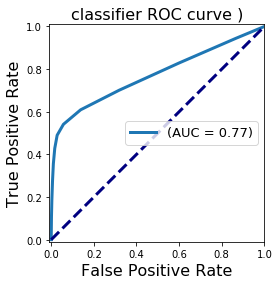

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 , the class distribution
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[87163  1079]
 [ 2285  1489]]

   Accuracy: 0.96

   Precision: 0.58

   Recall: 0.39

   F1: 0.47
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.97      0.99      0.98     88242
           1       0.58      0.39      0.47      3774

   micro avg       0.96      0.96      0.96     92016
   macro avg       0.78      0.69      0.73     92016
weighted avg       0.96      0.96      0.96     92016



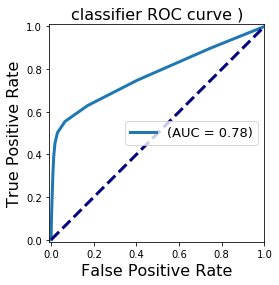

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 , the class distribution
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[87293   949]
 [ 2454  1320]]

   Accuracy: 0.96

   Precision: 0.58

   Recall: 0.35

   F1: 0.44
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.97      0.99      0.98     88242
           1       0.58      0.35      0.44      3774

   micro avg       0.96      0.96      0.96     92016
   macro avg       0.78      0.67      0.71     92016
weighted avg       0.96      0.96      0.96     92016



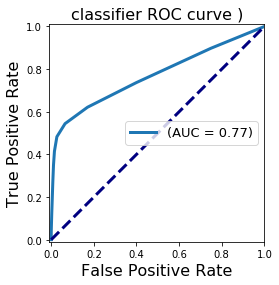

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 , the class distribution
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[87536   706]
 [ 2554  1220]]

   Accuracy: 0.96

   Precision: 0.63

   Recall: 0.32

   F1: 0.43
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.97      0.99      0.98     88242
           1       0.63      0.32      0.43      3774

   micro avg       0.96      0.96      0.96     92016
   macro avg       0.80      0.66      0.70     92016
weighted avg       0.96      0.96      0.96     92016



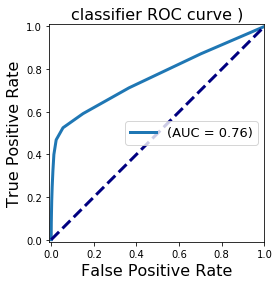

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 , the class distribution
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[87221  1021]
 [ 2359  1415]]

   Accuracy: 0.96

   Precision: 0.58

   Recall: 0.37

   F1: 0.46
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.97      0.99      0.98     88242
           1       0.58      0.37      0.46      3774

   micro avg       0.96      0.96      0.96     92016
   macro avg       0.78      0.68      0.72     92016
weighted avg       0.96      0.96      0.96     92016



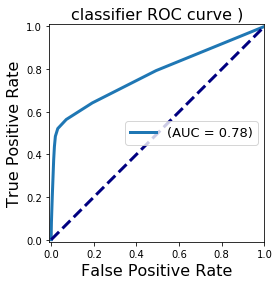

In [27]:
for i in [0.2,0.4,0.6,0.8,1]:
    print("---------------------------------------------------------------------------------------------------")
    print("When the ratio between the majority and the minority is", i,", the class distribution")
    X_resampled, y_resampled=oversampling_training_size(X=X_train,y=y_train,pro=i)
    print("-------------------------------------------Random Forest--------------------------------------------")
    forest_fit(X_resampled, y_resampled,X_test,y_test)

# Oversampling Logistic Rregression

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 , the class distribution
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[67747 20495]
 [ 1012  2762]]

   Accuracy: 0.77

   Precision: 0.12

   Recall: 0.73

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.77      0.86     88242
           1       0.12      0.73      0.20      3774

   micro avg       0.77      0.77      0.77     92016
   macro avg       0.55      0.75      0.53     92016
weighted avg       0.95      0.77      0.84     92016



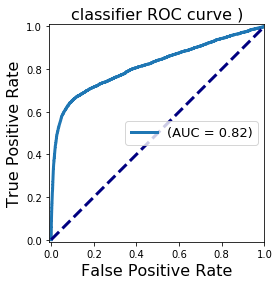

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 , the class distribution
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[46787 41455]
 [  642  3132]]

   Accuracy: 0.54

   Precision: 0.07

   Recall: 0.83

   F1: 0.13
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.53      0.69     88242
           1       0.07      0.83      0.13      3774

   micro avg       0.54      0.54      0.54     92016
   macro avg       0.53      0.68      0.41     92016
weighted avg       0.95      0.54      0.67     92016



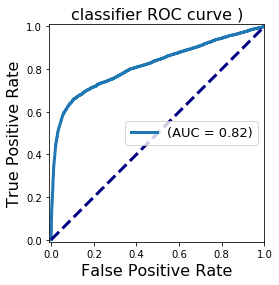

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 , the class distribution
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[33046 55196]
 [  422  3352]]

   Accuracy: 0.40

   Precision: 0.06

   Recall: 0.89

   F1: 0.11
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.37      0.54     88242
           1       0.06      0.89      0.11      3774

   micro avg       0.40      0.40      0.40     92016
   macro avg       0.52      0.63      0.33     92016
weighted avg       0.95      0.40      0.53     92016



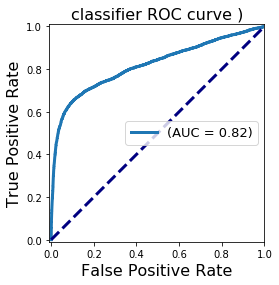

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 , the class distribution
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[23700 64542]
 [  287  3487]]

   Accuracy: 0.30

   Precision: 0.05

   Recall: 0.92

   F1: 0.10
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.27      0.42     88242
           1       0.05      0.92      0.10      3774

   micro avg       0.30      0.30      0.30     92016
   macro avg       0.52      0.60      0.26     92016
weighted avg       0.95      0.30      0.41     92016



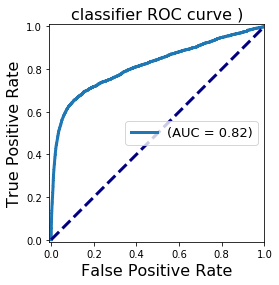

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 , the class distribution
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[16828 71414]
 [  183  3591]]

   Accuracy: 0.22

   Precision: 0.05

   Recall: 0.95

   F1: 0.09
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.19      0.32     88242
           1       0.05      0.95      0.09      3774

   micro avg       0.22      0.22      0.22     92016
   macro avg       0.52      0.57      0.21     92016
weighted avg       0.95      0.22      0.31     92016



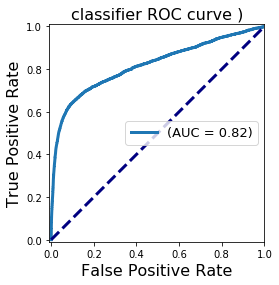

In [28]:
for i in [0.2,0.4,0.6,0.8,1]:
    print("---------------------------------------------------------------------------------------------------")
    print("When the ratio between the majority and the minority is", i,", the class distribution")
    X_resampled, y_resampled=oversampling_training_size(X=X_train,y=y_train,pro=i)
    print("--------------------------------------------Logistic Regression---------------------------------------")
    lr_fit(X_resampled, y_resampled,X_test,y_test)

# Oversampling Naive Bayes

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 , the class distribution
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[67406 20836]
 [ 1060  2714]]

   Accuracy: 0.76

   Precision: 0.12

   Recall: 0.72

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.76      0.86     88242
           1       0.12      0.72      0.20      3774

   micro avg       0.76      0.76      0.76     92016
   macro avg       0.55      0.74      0.53     92016
weighted avg       0.95      0.76      0.83     92016



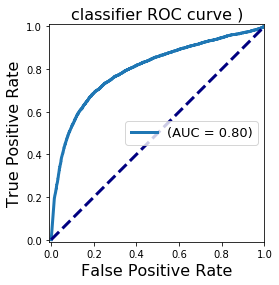

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 , the class distribution
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[65774 22468]
 [ 1000  2774]]

   Accuracy: 0.74

   Precision: 0.11

   Recall: 0.74

   F1: 0.19
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.75      0.85     88242
           1       0.11      0.74      0.19      3774

   micro avg       0.74      0.74      0.74     92016
   macro avg       0.55      0.74      0.52     92016
weighted avg       0.95      0.74      0.82     92016



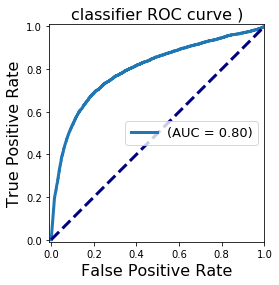

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 , the class distribution
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[63958 24284]
 [  952  2822]]

   Accuracy: 0.73

   Precision: 0.10

   Recall: 0.75

   F1: 0.18
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.72      0.84     88242
           1       0.10      0.75      0.18      3774

   micro avg       0.73      0.73      0.73     92016
   macro avg       0.54      0.74      0.51     92016
weighted avg       0.95      0.73      0.81     92016



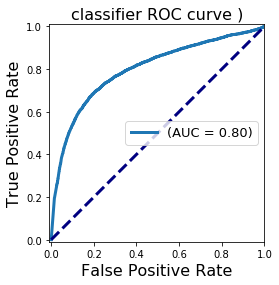

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 , the class distribution
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[62577 25665]
 [  909  2865]]

   Accuracy: 0.71

   Precision: 0.10

   Recall: 0.76

   F1: 0.18
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.71      0.82     88242
           1       0.10      0.76      0.18      3774

   micro avg       0.71      0.71      0.71     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.71      0.80     92016



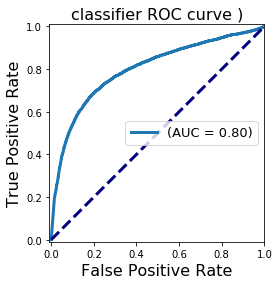

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 , the class distribution
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[61754 26488]
 [  880  2894]]

   Accuracy: 0.70

   Precision: 0.10

   Recall: 0.77

   F1: 0.17
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.70      0.82     88242
           1       0.10      0.77      0.17      3774

   micro avg       0.70      0.70      0.70     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.70      0.79     92016



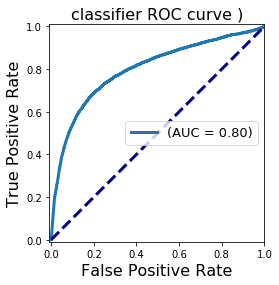

In [29]:
for i in [0.2,0.4,0.6,0.8,1]:
    print("---------------------------------------------------------------------------------------------------")
    print("When the ratio between the majority and the minority is", i,", the class distribution")
    X_resampled, y_resampled=oversampling_training_size(X=X_train,y=y_train,pro=i)
    print("--------------------------------------------Gaussian Naive Bayes-------------------------------------")
    nb_fit(X_resampled, y_resampled,X_test,y_test)

# Oversampling Gradient Boosting Tree

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 , the class distribution
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[83730  4512]
 [ 1499  2275]]

   Accuracy: 0.93

   Precision: 0.34

   Recall: 0.60

   F1: 0.43
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.95      0.97     88242
           1       0.34      0.60      0.43      3774

   micro avg       0.93      0.93      0.93     92016
   macro avg       0.66      0.78      0.70     92016
weighted avg       0.96      0.93      0.94     92016



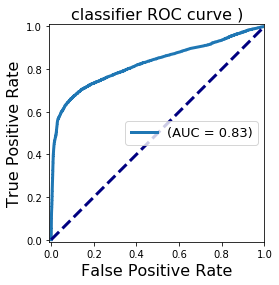

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 , the class distribution
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[80778  7464]
 [ 1313  2461]]

   Accuracy: 0.90

   Precision: 0.25

   Recall: 0.65

   F1: 0.36
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.92      0.95     88242
           1       0.25      0.65      0.36      3774

   micro avg       0.90      0.90      0.90     92016
   macro avg       0.62      0.78      0.65     92016
weighted avg       0.95      0.90      0.92     92016



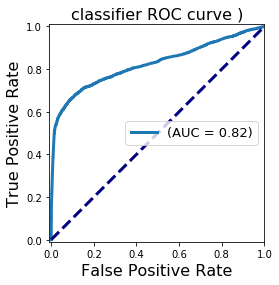

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 , the class distribution
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[78127 10115]
 [ 1193  2581]]

   Accuracy: 0.88

   Precision: 0.20

   Recall: 0.68

   F1: 0.31
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.89      0.93     88242
           1       0.20      0.68      0.31      3774

   micro avg       0.88      0.88      0.88     92016
   macro avg       0.59      0.78      0.62     92016
weighted avg       0.95      0.88      0.91     92016



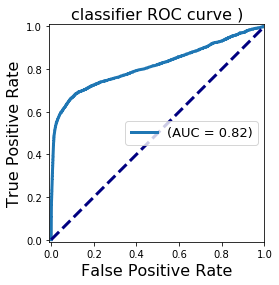

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 , the class distribution
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[75705 12537]
 [ 1112  2662]]

   Accuracy: 0.85

   Precision: 0.18

   Recall: 0.71

   F1: 0.28
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.86      0.92     88242
           1       0.18      0.71      0.28      3774

   micro avg       0.85      0.85      0.85     92016
   macro avg       0.58      0.78      0.60     92016
weighted avg       0.95      0.85      0.89     92016



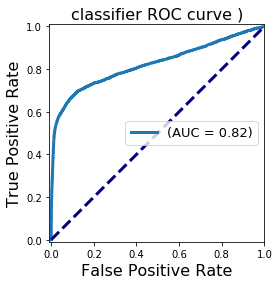

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 , the class distribution
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[66734 21508]
 [  952  2822]]

   Accuracy: 0.76

   Precision: 0.12

   Recall: 0.75

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.76      0.86     88242
           1       0.12      0.75      0.20      3774

   micro avg       0.76      0.76      0.76     92016
   macro avg       0.55      0.75      0.53     92016
weighted avg       0.95      0.76      0.83     92016



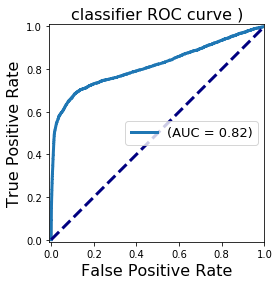

In [30]:
for i in [0.2,0.4,0.6,0.8,1]:
    print("---------------------------------------------------------------------------------------------------")
    print("When the ratio between the majority and the minority is", i,", the class distribution")
    X_resampled, y_resampled=oversampling_training_size(X=X_train,y=y_train,pro=i)
    print("--------------------------------------------Gradient-Boosted Tree-------------------------------------")
    Gradient_Boosting_fit(X_resampled, y_resampled,X_test,y_test)

# Oversampling SVM
#SVM with Oversampling resampling strategy--time consuming (not done)

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 , the class distribution
--------------------------------------------Support Vector Machine-------------------------------------
---Confusion Matrix---
 [[79617  8625]
 [ 1282  2492]]

   Accuracy: 0.89

   Precision: 0.22

   Recall: 0.66

   F1: 0.33
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.90      0.94     88242
           1       0.22      0.66      0.33      3774

   micro avg       0.89      0.89      0.89     92016
   macro avg       0.60      0.78      0.64     92016
weighted avg       0.95      0.89      0.92     92016

Metric 
 0.66  0.33  0.22  0.89
 0.82


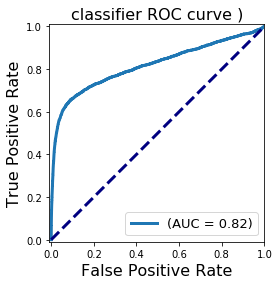

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 , the class distribution
--------------------------------------------Support Vector Machine-------------------------------------


In [ ]:
for i in [0.2,0.4,0.6,0.8,1]:
    print("---------------------------------------------------------------------------------------------------")
    print("When the ratio between the majority and the minority is", i,", the class distribution")
    X_resampled, y_resampled=oversampling_training_size(X=X_train,y=y_train,pro=i)
    print("--------------------------------------------Support Vector Machine-------------------------------------")
    svm_rbf_fit(X_resampled, y_resampled,X_test,y_test)

# Oversampling KNN

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 , the class distribution
--------------------------------------------KNN-------------------------------------
---Confusion Matrix---
 [[79207  9035]
 [ 1774  2000]]

   Accuracy: 0.88

   Precision: 0.18

   Recall: 0.53

   F1: 0.27
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.90      0.94     88242
           1       0.18      0.53      0.27      3774

   micro avg       0.88      0.88      0.88     92016
   macro avg       0.58      0.71      0.60     92016
weighted avg       0.95      0.88      0.91     92016

Metric 
 0.53  0.27  0.18  0.88
 0.71


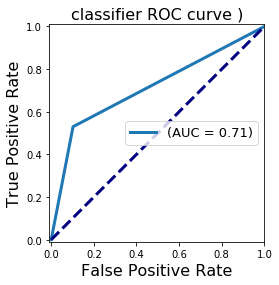

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 , the class distribution
--------------------------------------------KNN-------------------------------------
---Confusion Matrix---
 [[78063 10179]
 [ 1692  2082]]

   Accuracy: 0.87

   Precision: 0.17

   Recall: 0.55

   F1: 0.26
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.88      0.93     88242
           1       0.17      0.55      0.26      3774

   micro avg       0.87      0.87      0.87     92016
   macro avg       0.57      0.72      0.59     92016
weighted avg       0.95      0.87      0.90     92016

Metric 
 0.55  0.26  0.17  0.87
 0.72


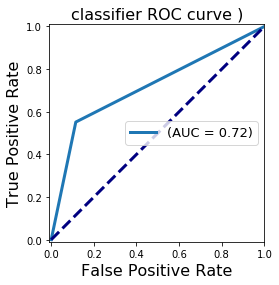

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 , the class distribution
--------------------------------------------KNN-------------------------------------
---Confusion Matrix---
 [[78058 10184]
 [ 1691  2083]]

   Accuracy: 0.87

   Precision: 0.17

   Recall: 0.55

   F1: 0.26
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.88      0.93     88242
           1       0.17      0.55      0.26      3774

   micro avg       0.87      0.87      0.87     92016
   macro avg       0.57      0.72      0.59     92016
weighted avg       0.95      0.87      0.90     92016

Metric 
 0.55  0.26  0.17  0.87
 0.72


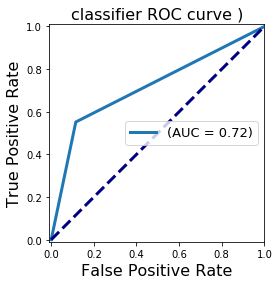

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 , the class distribution
--------------------------------------------KNN-------------------------------------
---Confusion Matrix---
 [[78058 10184]
 [ 1691  2083]]

   Accuracy: 0.87

   Precision: 0.17

   Recall: 0.55

   F1: 0.26
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.88      0.93     88242
           1       0.17      0.55      0.26      3774

   micro avg       0.87      0.87      0.87     92016
   macro avg       0.57      0.72      0.59     92016
weighted avg       0.95      0.87      0.90     92016

Metric 
 0.55  0.26  0.17  0.87
 0.72


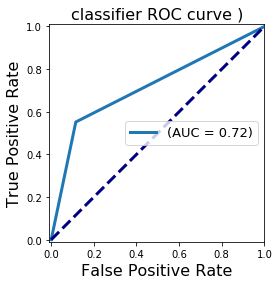

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 , the class distribution
--------------------------------------------KNN-------------------------------------
---Confusion Matrix---
 [[78058 10184]
 [ 1691  2083]]

   Accuracy: 0.87

   Precision: 0.17

   Recall: 0.55

   F1: 0.26
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.88      0.93     88242
           1       0.17      0.55      0.26      3774

   micro avg       0.87      0.87      0.87     92016
   macro avg       0.57      0.72      0.59     92016
weighted avg       0.95      0.87      0.90     92016

Metric 
 0.55  0.26  0.17  0.87
 0.72


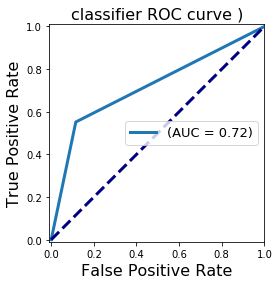

In [28]:
for i in [0.2,0.4,0.6,0.8,1]:
    print("---------------------------------------------------------------------------------------------------")
    print("When the ratio between the majority and the minority is", i,", the class distribution")
    X_resampled, y_resampled=oversampling_training_size(X=X_train,y=y_train,pro=i)
    print("--------------------------------------------KNN-------------------------------------")
    knn_fit(X_resampled, y_resampled,X_test,y_test)


# # Best SMOTE Ratio

In [24]:
def smote_training_size_k(X,y,pro,k):
    smote = SMOTE(ratio = pro,random_state=0, k_neighbors=k)
    X_resampled, y_resampled = smote.fit_sample(X, y)
    return X_resampled, y_resampled

# SMOTE DT

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 2  the class distribution
[205889  41177]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[85056  3186]
 [ 1734  2040]]

   Accuracy: 0.95

   Precision: 0.39

   Recall: 0.54

   F1: 0.45
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.96      0.97     88242
           1       0.39      0.54      0.45      3774

   micro avg       0.95      0.95      0.95     92016
   macro avg       0.69      0.75      0.71     92016
weighted avg       0.96      0.95      0.95     92016

Metric 
 0.54  0.45  0.39  0.95
 0.81


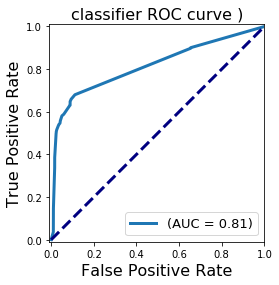

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 4  the class distribution
[205889  41177]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[85180  3062]
 [ 1698  2076]]

   Accuracy: 0.95

   Precision: 0.40

   Recall: 0.55

   F1: 0.47
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.97      0.97     88242
           1       0.40      0.55      0.47      3774

   micro avg       0.95      0.95      0.95     92016
   macro avg       0.69      0.76      0.72     92016
weighted avg       0.96      0.95      0.95     92016

Metric 
 0.55  0.47  0.40  0.95
 0.80


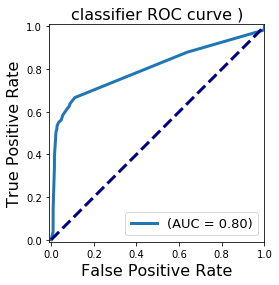

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 6  the class distribution
[205889  41177]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[84354  3888]
 [ 1633  2141]]

   Accuracy: 0.94

   Precision: 0.36

   Recall: 0.57

   F1: 0.44
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.96      0.97     88242
           1       0.36      0.57      0.44      3774

   micro avg       0.94      0.94      0.94     92016
   macro avg       0.67      0.76      0.70     92016
weighted avg       0.96      0.94      0.95     92016

Metric 
 0.57  0.44  0.36  0.94
 0.80


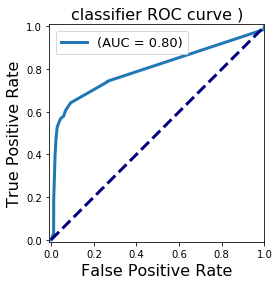

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 8  the class distribution
[205889  41177]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[84861  3381]
 [ 1716  2058]]

   Accuracy: 0.94

   Precision: 0.38

   Recall: 0.55

   F1: 0.45
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.96      0.97     88242
           1       0.38      0.55      0.45      3774

   micro avg       0.94      0.94      0.94     92016
   macro avg       0.68      0.75      0.71     92016
weighted avg       0.96      0.94      0.95     92016

Metric 
 0.55  0.45  0.38  0.94
 0.79


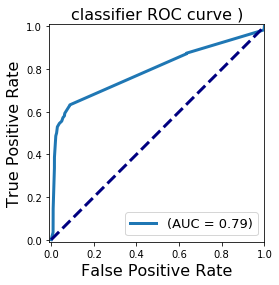

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 10  the class distribution
[205889  41177]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[84393  3849]
 [ 1640  2134]]

   Accuracy: 0.94

   Precision: 0.36

   Recall: 0.57

   F1: 0.44
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.96      0.97     88242
           1       0.36      0.57      0.44      3774

   micro avg       0.94      0.94      0.94     92016
   macro avg       0.67      0.76      0.70     92016
weighted avg       0.96      0.94      0.95     92016

Metric 
 0.57  0.44  0.36  0.94
 0.81


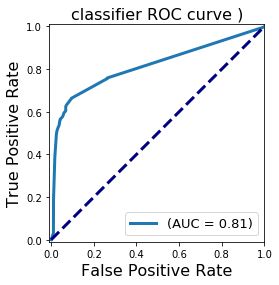

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 12  the class distribution
[205889  41177]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[84867  3375]
 [ 1671  2103]]

   Accuracy: 0.95

   Precision: 0.38

   Recall: 0.56

   F1: 0.45
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.96      0.97     88242
           1       0.38      0.56      0.45      3774

   micro avg       0.95      0.95      0.95     92016
   macro avg       0.68      0.76      0.71     92016
weighted avg       0.96      0.95      0.95     92016

Metric 
 0.56  0.45  0.38  0.95
 0.80


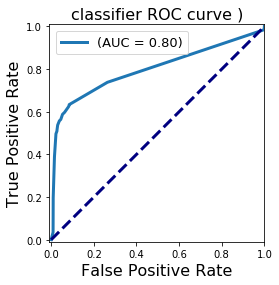

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 14  the class distribution
[205889  41177]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[84288  3954]
 [ 1635  2139]]

   Accuracy: 0.94

   Precision: 0.35

   Recall: 0.57

   F1: 0.43
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.96      0.97     88242
           1       0.35      0.57      0.43      3774

   micro avg       0.94      0.94      0.94     92016
   macro avg       0.67      0.76      0.70     92016
weighted avg       0.96      0.94      0.95     92016

Metric 
 0.57  0.43  0.35  0.94
 0.80


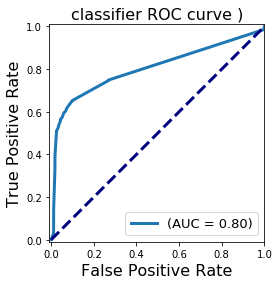

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 2  the class distribution
[205889  82355]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[77678 10564]
 [ 1450  2324]]

   Accuracy: 0.87

   Precision: 0.18

   Recall: 0.62

   F1: 0.28
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.88      0.93     88242
           1       0.18      0.62      0.28      3774

   micro avg       0.87      0.87      0.87     92016
   macro avg       0.58      0.75      0.60     92016
weighted avg       0.95      0.87      0.90     92016

Metric 
 0.62  0.28  0.18  0.87
 0.77


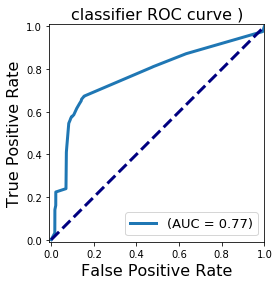

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 4  the class distribution
[205889  82355]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[73661 14581]
 [ 1386  2388]]

   Accuracy: 0.83

   Precision: 0.14

   Recall: 0.63

   F1: 0.23
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.83      0.90     88242
           1       0.14      0.63      0.23      3774

   micro avg       0.83      0.83      0.83     92016
   macro avg       0.56      0.73      0.57     92016
weighted avg       0.95      0.83      0.87     92016

Metric 
 0.63  0.23  0.14  0.83
 0.77


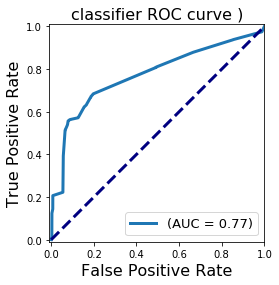

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 6  the class distribution
[205889  82355]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[75937 12305]
 [ 1417  2357]]

   Accuracy: 0.85

   Precision: 0.16

   Recall: 0.62

   F1: 0.26
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.86      0.92     88242
           1       0.16      0.62      0.26      3774

   micro avg       0.85      0.85      0.85     92016
   macro avg       0.57      0.74      0.59     92016
weighted avg       0.95      0.85      0.89     92016

Metric 
 0.62  0.26  0.16  0.85
 0.79


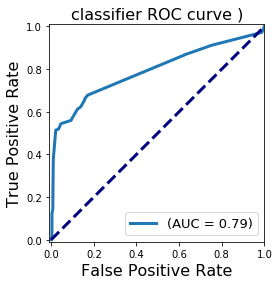

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 8  the class distribution
[205889  82355]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[76256 11986]
 [ 1399  2375]]

   Accuracy: 0.85

   Precision: 0.17

   Recall: 0.63

   F1: 0.26
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.86      0.92     88242
           1       0.17      0.63      0.26      3774

   micro avg       0.85      0.85      0.85     92016
   macro avg       0.57      0.75      0.59     92016
weighted avg       0.95      0.85      0.89     92016

Metric 
 0.63  0.26  0.17  0.85
 0.79


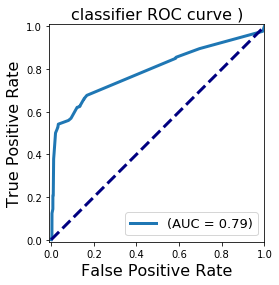

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 10  the class distribution
[205889  82355]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[73666 14576]
 [ 1346  2428]]

   Accuracy: 0.83

   Precision: 0.14

   Recall: 0.64

   F1: 0.23
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.83      0.90     88242
           1       0.14      0.64      0.23      3774

   micro avg       0.83      0.83      0.83     92016
   macro avg       0.56      0.74      0.57     92016
weighted avg       0.95      0.83      0.88     92016

Metric 
 0.64  0.23  0.14  0.83
 0.78


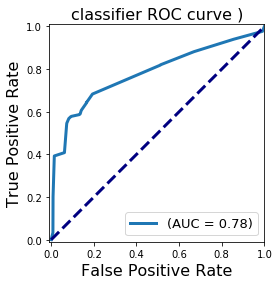

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 12  the class distribution
[205889  82355]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[75823 12419]
 [ 1341  2433]]

   Accuracy: 0.85

   Precision: 0.16

   Recall: 0.64

   F1: 0.26
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.86      0.92     88242
           1       0.16      0.64      0.26      3774

   micro avg       0.85      0.85      0.85     92016
   macro avg       0.57      0.75      0.59     92016
weighted avg       0.95      0.85      0.89     92016

Metric 
 0.64  0.26  0.16  0.85
 0.79


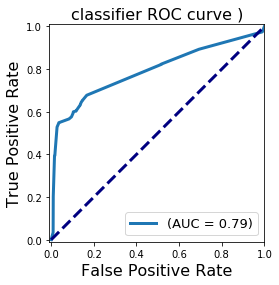

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 14  the class distribution
[205889  82355]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[79622  8620]
 [ 1336  2438]]

   Accuracy: 0.89

   Precision: 0.22

   Recall: 0.65

   F1: 0.33
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.90      0.94     88242
           1       0.22      0.65      0.33      3774

   micro avg       0.89      0.89      0.89     92016
   macro avg       0.60      0.77      0.63     92016
weighted avg       0.95      0.89      0.92     92016

Metric 
 0.65  0.33  0.22  0.89
 0.81


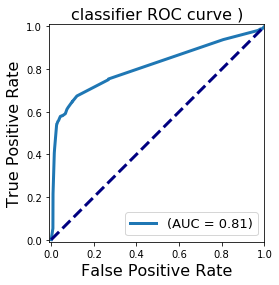

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 2  the class distribution
[205889 123533]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[76445 11797]
 [ 1311  2463]]

   Accuracy: 0.86

   Precision: 0.17

   Recall: 0.65

   F1: 0.27
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.87      0.92     88242
           1       0.17      0.65      0.27      3774

   micro avg       0.86      0.86      0.86     92016
   macro avg       0.58      0.76      0.60     92016
weighted avg       0.95      0.86      0.89     92016

Metric 
 0.65  0.27  0.17  0.86
 0.80


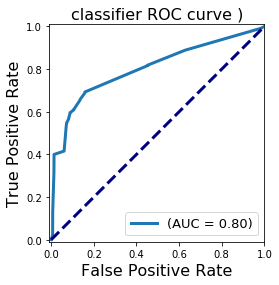

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 4  the class distribution
[205889 123533]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[76644 11598]
 [ 1440  2334]]

   Accuracy: 0.86

   Precision: 0.17

   Recall: 0.62

   F1: 0.26
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.87      0.92     88242
           1       0.17      0.62      0.26      3774

   micro avg       0.86      0.86      0.86     92016
   macro avg       0.57      0.74      0.59     92016
weighted avg       0.95      0.86      0.89     92016

Metric 
 0.62  0.26  0.17  0.86
 0.79


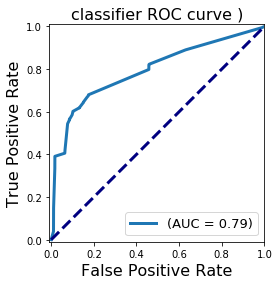

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 6  the class distribution
[205889 123533]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[74059 14183]
 [ 1304  2470]]

   Accuracy: 0.83

   Precision: 0.15

   Recall: 0.65

   F1: 0.24
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.84      0.91     88242
           1       0.15      0.65      0.24      3774

   micro avg       0.83      0.83      0.83     92016
   macro avg       0.57      0.75      0.57     92016
weighted avg       0.95      0.83      0.88     92016

Metric 
 0.65  0.24  0.15  0.83
 0.80


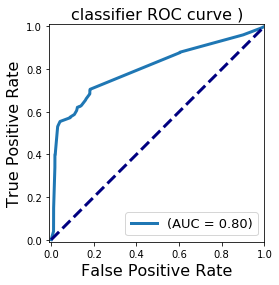

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 8  the class distribution
[205889 123533]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[73465 14777]
 [ 1287  2487]]

   Accuracy: 0.83

   Precision: 0.14

   Recall: 0.66

   F1: 0.24
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.83      0.90     88242
           1       0.14      0.66      0.24      3774

   micro avg       0.83      0.83      0.83     92016
   macro avg       0.56      0.75      0.57     92016
weighted avg       0.95      0.83      0.87     92016

Metric 
 0.66  0.24  0.14  0.83
 0.79


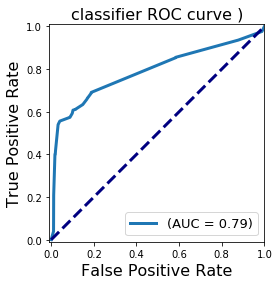

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 10  the class distribution
[205889 123533]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[74014 14228]
 [ 1318  2456]]

   Accuracy: 0.83

   Precision: 0.15

   Recall: 0.65

   F1: 0.24
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.84      0.90     88242
           1       0.15      0.65      0.24      3774

   micro avg       0.83      0.83      0.83     92016
   macro avg       0.56      0.74      0.57     92016
weighted avg       0.95      0.83      0.88     92016

Metric 
 0.65  0.24  0.15  0.83
 0.81


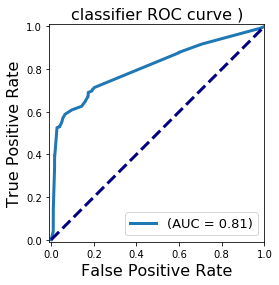

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 12  the class distribution
[205889 123533]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[73741 14501]
 [ 1314  2460]]

   Accuracy: 0.83

   Precision: 0.15

   Recall: 0.65

   F1: 0.24
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.84      0.90     88242
           1       0.15      0.65      0.24      3774

   micro avg       0.83      0.83      0.83     92016
   macro avg       0.56      0.74      0.57     92016
weighted avg       0.95      0.83      0.88     92016

Metric 
 0.65  0.24  0.15  0.83
 0.80


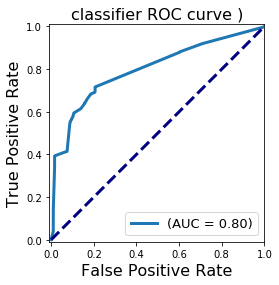

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 14  the class distribution
[205889 123533]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[74080 14162]
 [ 1331  2443]]

   Accuracy: 0.83

   Precision: 0.15

   Recall: 0.65

   F1: 0.24
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.84      0.91     88242
           1       0.15      0.65      0.24      3774

   micro avg       0.83      0.83      0.83     92016
   macro avg       0.56      0.74      0.57     92016
weighted avg       0.95      0.83      0.88     92016

Metric 
 0.65  0.24  0.15  0.83
 0.79


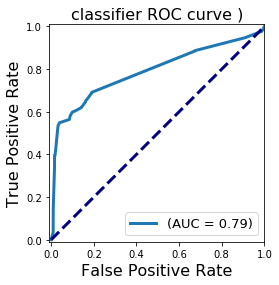

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 2  the class distribution
[205889 164711]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[74225 14017]
 [ 1286  2488]]

   Accuracy: 0.83

   Precision: 0.15

   Recall: 0.66

   F1: 0.25
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.84      0.91     88242
           1       0.15      0.66      0.25      3774

   micro avg       0.83      0.83      0.83     92016
   macro avg       0.57      0.75      0.58     92016
weighted avg       0.95      0.83      0.88     92016

Metric 
 0.66  0.25  0.15  0.83
 0.78


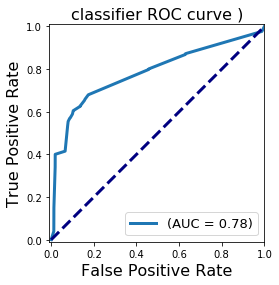

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 4  the class distribution
[205889 164711]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[73549 14693]
 [ 1282  2492]]

   Accuracy: 0.83

   Precision: 0.15

   Recall: 0.66

   F1: 0.24
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.83      0.90     88242
           1       0.15      0.66      0.24      3774

   micro avg       0.83      0.83      0.83     92016
   macro avg       0.56      0.75      0.57     92016
weighted avg       0.95      0.83      0.87     92016

Metric 
 0.66  0.24  0.15  0.83
 0.78


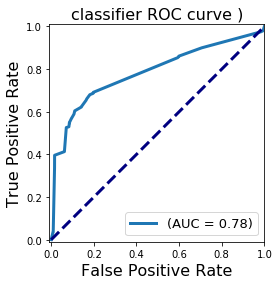

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 6  the class distribution
[205889 164711]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[73568 14674]
 [ 1229  2545]]

   Accuracy: 0.83

   Precision: 0.15

   Recall: 0.67

   F1: 0.24
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.83      0.90     88242
           1       0.15      0.67      0.24      3774

   micro avg       0.83      0.83      0.83     92016
   macro avg       0.57      0.75      0.57     92016
weighted avg       0.95      0.83      0.88     92016

Metric 
 0.67  0.24  0.15  0.83
 0.80


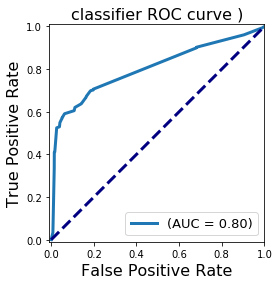

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 8  the class distribution
[205889 164711]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[73291 14951]
 [ 1273  2501]]

   Accuracy: 0.82

   Precision: 0.14

   Recall: 0.66

   F1: 0.24
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.83      0.90     88242
           1       0.14      0.66      0.24      3774

   micro avg       0.82      0.82      0.82     92016
   macro avg       0.56      0.75      0.57     92016
weighted avg       0.95      0.82      0.87     92016

Metric 
 0.66  0.24  0.14  0.82
 0.79


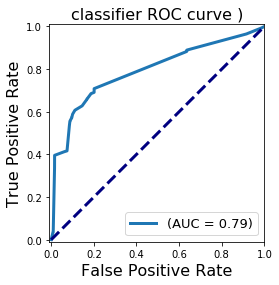

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 10  the class distribution
[205889 164711]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[73138 15104]
 [ 1251  2523]]

   Accuracy: 0.82

   Precision: 0.14

   Recall: 0.67

   F1: 0.24
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.83      0.90     88242
           1       0.14      0.67      0.24      3774

   micro avg       0.82      0.82      0.82     92016
   macro avg       0.56      0.75      0.57     92016
weighted avg       0.95      0.82      0.87     92016

Metric 
 0.67  0.24  0.14  0.82
 0.79


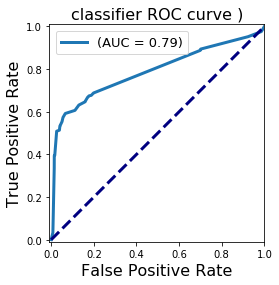

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 12  the class distribution
[205889 164711]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[72795 15447]
 [ 1227  2547]]

   Accuracy: 0.82

   Precision: 0.14

   Recall: 0.67

   F1: 0.23
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.82      0.90     88242
           1       0.14      0.67      0.23      3774

   micro avg       0.82      0.82      0.82     92016
   macro avg       0.56      0.75      0.57     92016
weighted avg       0.95      0.82      0.87     92016

Metric 
 0.67  0.23  0.14  0.82
 0.79


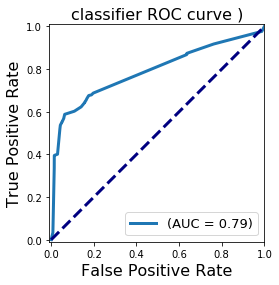

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 14  the class distribution
[205889 164711]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[73695 14547]
 [ 1296  2478]]

   Accuracy: 0.83

   Precision: 0.15

   Recall: 0.66

   F1: 0.24
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.84      0.90     88242
           1       0.15      0.66      0.24      3774

   micro avg       0.83      0.83      0.83     92016
   macro avg       0.56      0.75      0.57     92016
weighted avg       0.95      0.83      0.88     92016

Metric 
 0.66  0.24  0.15  0.83
 0.78


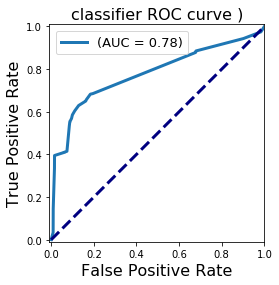

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 2  the class distribution
[205889 205889]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[73613 14629]
 [ 1234  2540]]

   Accuracy: 0.83

   Precision: 0.15

   Recall: 0.67

   F1: 0.24
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.83      0.90     88242
           1       0.15      0.67      0.24      3774

   micro avg       0.83      0.83      0.83     92016
   macro avg       0.57      0.75      0.57     92016
weighted avg       0.95      0.83      0.88     92016

Metric 
 0.67  0.24  0.15  0.83
 0.77


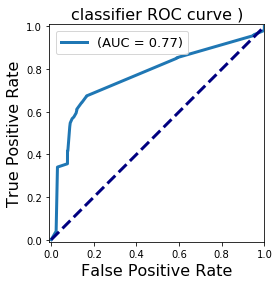

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 4  the class distribution
[205889 205889]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[69423 18819]
 [ 1195  2579]]

   Accuracy: 0.78

   Precision: 0.12

   Recall: 0.68

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.79      0.87     88242
           1       0.12      0.68      0.20      3774

   micro avg       0.78      0.78      0.78     92016
   macro avg       0.55      0.74      0.54     92016
weighted avg       0.95      0.78      0.85     92016

Metric 
 0.68  0.20  0.12  0.78
 0.78


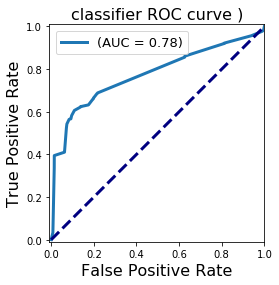

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 6  the class distribution
[205889 205889]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[68978 19264]
 [ 1077  2697]]

   Accuracy: 0.78

   Precision: 0.12

   Recall: 0.71

   F1: 0.21
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.78      0.87     88242
           1       0.12      0.71      0.21      3774

   micro avg       0.78      0.78      0.78     92016
   macro avg       0.55      0.75      0.54     92016
weighted avg       0.95      0.78      0.84     92016

Metric 
 0.71  0.21  0.12  0.78
 0.79


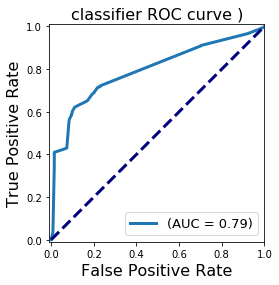

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 8  the class distribution
[205889 205889]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[70317 17925]
 [ 1174  2600]]

   Accuracy: 0.79

   Precision: 0.13

   Recall: 0.69

   F1: 0.21
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.80      0.88     88242
           1       0.13      0.69      0.21      3774

   micro avg       0.79      0.79      0.79     92016
   macro avg       0.56      0.74      0.55     92016
weighted avg       0.95      0.79      0.85     92016

Metric 
 0.69  0.21  0.13  0.79
 0.78


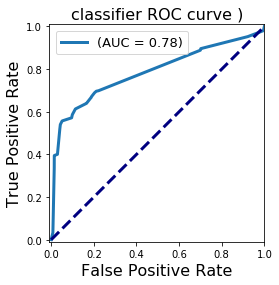

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 10  the class distribution
[205889 205889]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[69829 18413]
 [ 1110  2664]]

   Accuracy: 0.79

   Precision: 0.13

   Recall: 0.71

   F1: 0.21
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.79      0.88     88242
           1       0.13      0.71      0.21      3774

   micro avg       0.79      0.79      0.79     92016
   macro avg       0.56      0.75      0.55     92016
weighted avg       0.95      0.79      0.85     92016

Metric 
 0.71  0.21  0.13  0.79
 0.80


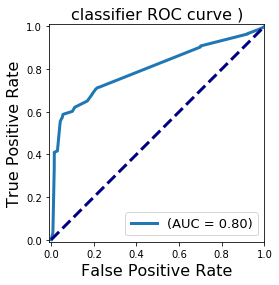

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 12  the class distribution
[205889 205889]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[67372 20870]
 [ 1124  2650]]

   Accuracy: 0.76

   Precision: 0.11

   Recall: 0.70

   F1: 0.19
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.76      0.86     88242
           1       0.11      0.70      0.19      3774

   micro avg       0.76      0.76      0.76     92016
   macro avg       0.55      0.73      0.53     92016
weighted avg       0.95      0.76      0.83     92016

Metric 
 0.70  0.19  0.11  0.76
 0.77


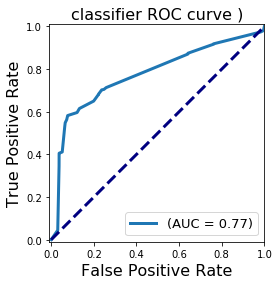

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 14  the class distribution
[205889 205889]
-------------------------------------------Decision Tree--------------------------------------------
---Confusion Matrix---
 [[71408 16834]
 [ 1253  2521]]

   Accuracy: 0.80

   Precision: 0.13

   Recall: 0.67

   F1: 0.22
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.81      0.89     88242
           1       0.13      0.67      0.22      3774

   micro avg       0.80      0.80      0.80     92016
   macro avg       0.56      0.74      0.55     92016
weighted avg       0.95      0.80      0.86     92016

Metric 
 0.67  0.22  0.13  0.80
 0.78


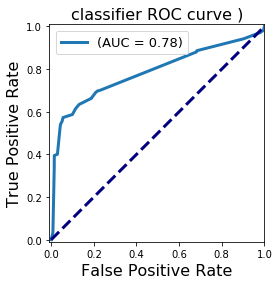

In [70]:
for i in [0.2,0.4,0.6,0.8,1]:
    for k in range(2,16,2):
        print("---------------------------------------------------------------------------------------------------")
        print("When the ratio between the majority and the minority is", i,"and neighbor is",k," the class distribution")
        X_resampled, y_resampled=smote_training_size_k(X=X_train,y=y_train,pro=i,k=k)
        print(np.bincount(y_resampled.astype(int)))
        print("-------------------------------------------Decision Tree--------------------------------------------")
        dt_fit(X_resampled, y_resampled,X_test,y_test)

# SMOTE RF

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 2  the class distribution
[205889  41177]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[82349  5893]
 [ 1758  2016]]

   Accuracy: 0.92

   Precision: 0.25

   Recall: 0.53

   F1: 0.35
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.93      0.96     88242
           1       0.25      0.53      0.35      3774

   micro avg       0.92      0.92      0.92     92016
   macro avg       0.62      0.73      0.65     92016
weighted avg       0.95      0.92      0.93     92016

Metric 
 0.53  0.35  0.25  0.92
 0.77


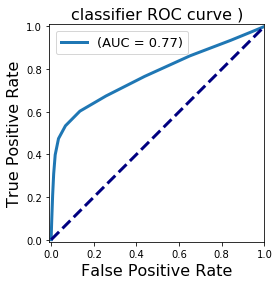

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 4  the class distribution
[205889  41177]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[81583  6659]
 [ 1764  2010]]

   Accuracy: 0.91

   Precision: 0.23

   Recall: 0.53

   F1: 0.32
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.92      0.95     88242
           1       0.23      0.53      0.32      3774

   micro avg       0.91      0.91      0.91     92016
   macro avg       0.61      0.73      0.64     92016
weighted avg       0.95      0.91      0.93     92016

Metric 
 0.53  0.32  0.23  0.91
 0.76


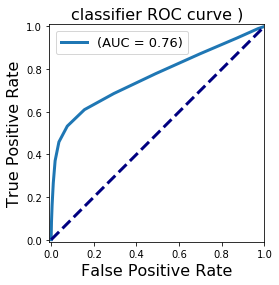

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 6  the class distribution
[205889  41177]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[81128  7114]
 [ 1761  2013]]

   Accuracy: 0.90

   Precision: 0.22

   Recall: 0.53

   F1: 0.31
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.92      0.95     88242
           1       0.22      0.53      0.31      3774

   micro avg       0.90      0.90      0.90     92016
   macro avg       0.60      0.73      0.63     92016
weighted avg       0.95      0.90      0.92     92016

Metric 
 0.53  0.31  0.22  0.90
 0.77


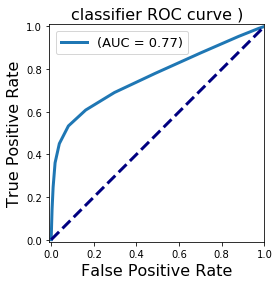

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 8  the class distribution
[205889  41177]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[82053  6189]
 [ 1803  1971]]

   Accuracy: 0.91

   Precision: 0.24

   Recall: 0.52

   F1: 0.33
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.93      0.95     88242
           1       0.24      0.52      0.33      3774

   micro avg       0.91      0.91      0.91     92016
   macro avg       0.61      0.73      0.64     92016
weighted avg       0.95      0.91      0.93     92016

Metric 
 0.52  0.33  0.24  0.91
 0.77


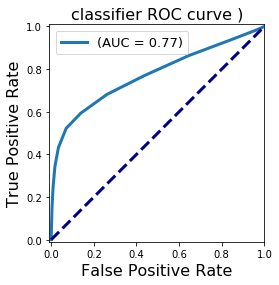

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 10  the class distribution
[205889  41177]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[80658  7584]
 [ 1709  2065]]

   Accuracy: 0.90

   Precision: 0.21

   Recall: 0.55

   F1: 0.31
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.91      0.95     88242
           1       0.21      0.55      0.31      3774

   micro avg       0.90      0.90      0.90     92016
   macro avg       0.60      0.73      0.63     92016
weighted avg       0.95      0.90      0.92     92016

Metric 
 0.55  0.31  0.21  0.90
 0.77


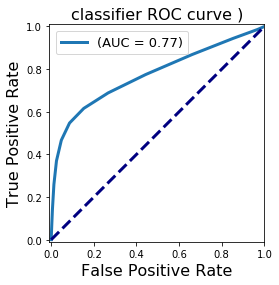

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 12  the class distribution
[205889  41177]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[81910  6332]
 [ 1738  2036]]

   Accuracy: 0.91

   Precision: 0.24

   Recall: 0.54

   F1: 0.34
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.93      0.95     88242
           1       0.24      0.54      0.34      3774

   micro avg       0.91      0.91      0.91     92016
   macro avg       0.61      0.73      0.64     92016
weighted avg       0.95      0.91      0.93     92016

Metric 
 0.54  0.34  0.24  0.91
 0.77


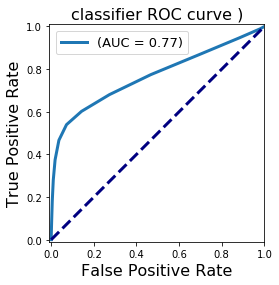

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 14  the class distribution
[205889  41177]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[79939  8303]
 [ 1761  2013]]

   Accuracy: 0.89

   Precision: 0.20

   Recall: 0.53

   F1: 0.29
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.91      0.94     88242
           1       0.20      0.53      0.29      3774

   micro avg       0.89      0.89      0.89     92016
   macro avg       0.59      0.72      0.61     92016
weighted avg       0.95      0.89      0.91     92016

Metric 
 0.53  0.29  0.20  0.89
 0.77


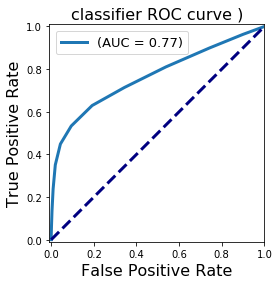

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 2  the class distribution
[205889  82355]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[82997  5245]
 [ 1844  1930]]

   Accuracy: 0.92

   Precision: 0.27

   Recall: 0.51

   F1: 0.35
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.94      0.96     88242
           1       0.27      0.51      0.35      3774

   micro avg       0.92      0.92      0.92     92016
   macro avg       0.62      0.73      0.66     92016
weighted avg       0.95      0.92      0.93     92016

Metric 
 0.51  0.35  0.27  0.92
 0.77


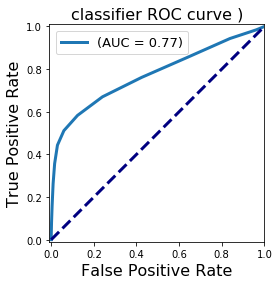

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 4  the class distribution
[205889  82355]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[80545  7697]
 [ 1757  2017]]

   Accuracy: 0.90

   Precision: 0.21

   Recall: 0.53

   F1: 0.30
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.91      0.94     88242
           1       0.21      0.53      0.30      3774

   micro avg       0.90      0.90      0.90     92016
   macro avg       0.59      0.72      0.62     92016
weighted avg       0.95      0.90      0.92     92016

Metric 
 0.53  0.30  0.21  0.90
 0.76


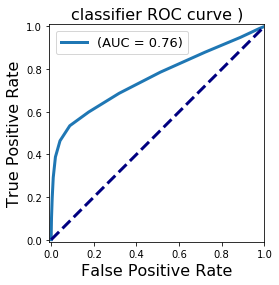

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 6  the class distribution
[205889  82355]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[77490 10752]
 [ 1646  2128]]

   Accuracy: 0.87

   Precision: 0.17

   Recall: 0.56

   F1: 0.26
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.88      0.93     88242
           1       0.17      0.56      0.26      3774

   micro avg       0.87      0.87      0.87     92016
   macro avg       0.57      0.72      0.59     92016
weighted avg       0.95      0.87      0.90     92016

Metric 
 0.56  0.26  0.17  0.87
 0.76


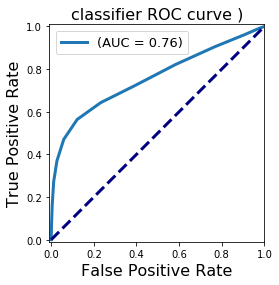

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 8  the class distribution
[205889  82355]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[78749  9493]
 [ 1676  2098]]

   Accuracy: 0.88

   Precision: 0.18

   Recall: 0.56

   F1: 0.27
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.89      0.93     88242
           1       0.18      0.56      0.27      3774

   micro avg       0.88      0.88      0.88     92016
   macro avg       0.58      0.72      0.60     92016
weighted avg       0.95      0.88      0.91     92016

Metric 
 0.56  0.27  0.18  0.88
 0.76


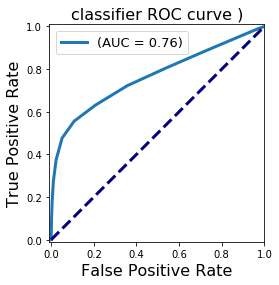

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 10  the class distribution
[205889  82355]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[77033 11209]
 [ 1795  1979]]

   Accuracy: 0.86

   Precision: 0.15

   Recall: 0.52

   F1: 0.23
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.87      0.92     88242
           1       0.15      0.52      0.23      3774

   micro avg       0.86      0.86      0.86     92016
   macro avg       0.56      0.70      0.58     92016
weighted avg       0.94      0.86      0.89     92016

Metric 
 0.52  0.23  0.15  0.86
 0.74


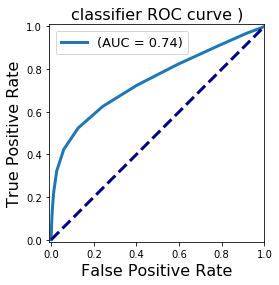

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 12  the class distribution
[205889  82355]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[78314  9928]
 [ 1678  2096]]

   Accuracy: 0.87

   Precision: 0.17

   Recall: 0.56

   F1: 0.27
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.89      0.93     88242
           1       0.17      0.56      0.27      3774

   micro avg       0.87      0.87      0.87     92016
   macro avg       0.58      0.72      0.60     92016
weighted avg       0.95      0.87      0.90     92016

Metric 
 0.56  0.27  0.17  0.87
 0.76


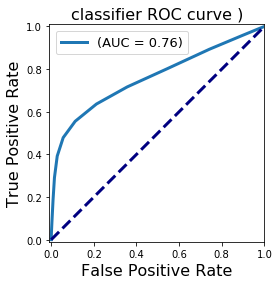

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 14  the class distribution
[205889  82355]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[79648  8594]
 [ 1653  2121]]

   Accuracy: 0.89

   Precision: 0.20

   Recall: 0.56

   F1: 0.29
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.90      0.94     88242
           1       0.20      0.56      0.29      3774

   micro avg       0.89      0.89      0.89     92016
   macro avg       0.59      0.73      0.62     92016
weighted avg       0.95      0.89      0.91     92016

Metric 
 0.56  0.29  0.20  0.89
 0.77


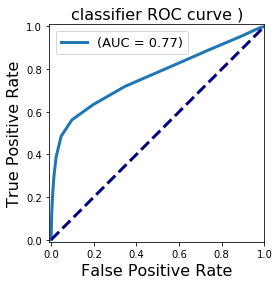

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 2  the class distribution
[205889 123533]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[81021  7221]
 [ 1851  1923]]

   Accuracy: 0.90

   Precision: 0.21

   Recall: 0.51

   F1: 0.30
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.92      0.95     88242
           1       0.21      0.51      0.30      3774

   micro avg       0.90      0.90      0.90     92016
   macro avg       0.59      0.71      0.62     92016
weighted avg       0.95      0.90      0.92     92016

Metric 
 0.51  0.30  0.21  0.90
 0.75


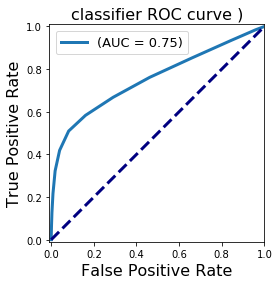

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 4  the class distribution
[205889 123533]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[76792 11450]
 [ 1859  1915]]

   Accuracy: 0.86

   Precision: 0.14

   Recall: 0.51

   F1: 0.22
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.87      0.92     88242
           1       0.14      0.51      0.22      3774

   micro avg       0.86      0.86      0.86     92016
   macro avg       0.56      0.69      0.57     92016
weighted avg       0.94      0.86      0.89     92016

Metric 
 0.51  0.22  0.14  0.86
 0.74


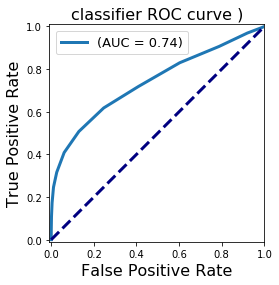

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 6  the class distribution
[205889 123533]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[73769 14473]
 [ 1649  2125]]

   Accuracy: 0.82

   Precision: 0.13

   Recall: 0.56

   F1: 0.21
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.84      0.90     88242
           1       0.13      0.56      0.21      3774

   micro avg       0.82      0.82      0.82     92016
   macro avg       0.55      0.70      0.56     92016
weighted avg       0.94      0.82      0.87     92016

Metric 
 0.56  0.21  0.13  0.82
 0.74


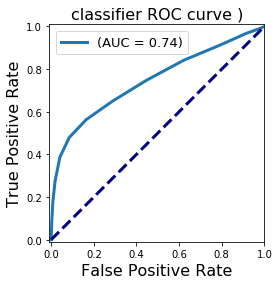

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 8  the class distribution
[205889 123533]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[72651 15591]
 [ 1625  2149]]

   Accuracy: 0.81

   Precision: 0.12

   Recall: 0.57

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.82      0.89     88242
           1       0.12      0.57      0.20      3774

   micro avg       0.81      0.81      0.81     92016
   macro avg       0.55      0.70      0.55     92016
weighted avg       0.94      0.81      0.87     92016

Metric 
 0.57  0.20  0.12  0.81
 0.74


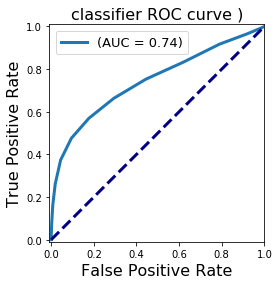

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 10  the class distribution
[205889 123533]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[74446 13796]
 [ 1545  2229]]

   Accuracy: 0.83

   Precision: 0.14

   Recall: 0.59

   F1: 0.23
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.84      0.91     88242
           1       0.14      0.59      0.23      3774

   micro avg       0.83      0.83      0.83     92016
   macro avg       0.56      0.72      0.57     92016
weighted avg       0.95      0.83      0.88     92016

Metric 
 0.59  0.23  0.14  0.83
 0.76


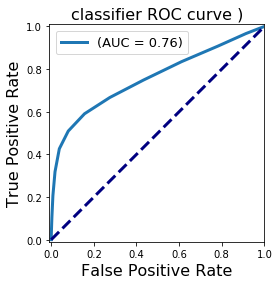

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 12  the class distribution
[205889 123533]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[74964 13278]
 [ 1580  2194]]

   Accuracy: 0.84

   Precision: 0.14

   Recall: 0.58

   F1: 0.23
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.85      0.91     88242
           1       0.14      0.58      0.23      3774

   micro avg       0.84      0.84      0.84     92016
   macro avg       0.56      0.72      0.57     92016
weighted avg       0.95      0.84      0.88     92016

Metric 
 0.58  0.23  0.14  0.84
 0.75


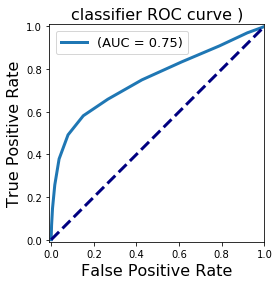

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 14  the class distribution
[205889 123533]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[73287 14955]
 [ 1509  2265]]

   Accuracy: 0.82

   Precision: 0.13

   Recall: 0.60

   F1: 0.22
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.83      0.90     88242
           1       0.13      0.60      0.22      3774

   micro avg       0.82      0.82      0.82     92016
   macro avg       0.56      0.72      0.56     92016
weighted avg       0.95      0.82      0.87     92016

Metric 
 0.60  0.22  0.13  0.82
 0.75


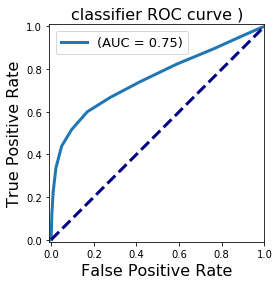

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 2  the class distribution
[205889 164711]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[79892  8350]
 [ 1885  1889]]

   Accuracy: 0.89

   Precision: 0.18

   Recall: 0.50

   F1: 0.27
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.91      0.94     88242
           1       0.18      0.50      0.27      3774

   micro avg       0.89      0.89      0.89     92016
   macro avg       0.58      0.70      0.60     92016
weighted avg       0.94      0.89      0.91     92016

Metric 
 0.50  0.27  0.18  0.89
 0.75


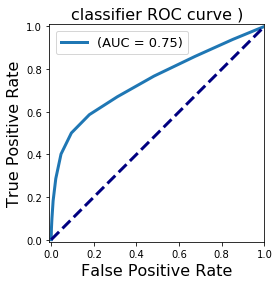

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 4  the class distribution
[205889 164711]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[75415 12827]
 [ 1746  2028]]

   Accuracy: 0.84

   Precision: 0.14

   Recall: 0.54

   F1: 0.22
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.85      0.91     88242
           1       0.14      0.54      0.22      3774

   micro avg       0.84      0.84      0.84     92016
   macro avg       0.56      0.70      0.56     92016
weighted avg       0.94      0.84      0.88     92016

Metric 
 0.54  0.22  0.14  0.84
 0.74


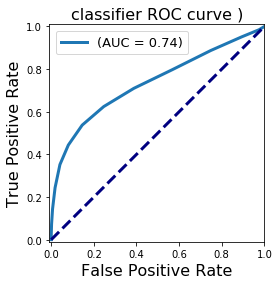

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 6  the class distribution
[205889 164711]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[80187  8055]
 [ 1804  1970]]

   Accuracy: 0.89

   Precision: 0.20

   Recall: 0.52

   F1: 0.29
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.91      0.94     88242
           1       0.20      0.52      0.29      3774

   micro avg       0.89      0.89      0.89     92016
   macro avg       0.59      0.72      0.61     92016
weighted avg       0.95      0.89      0.92     92016

Metric 
 0.52  0.29  0.20  0.89
 0.76


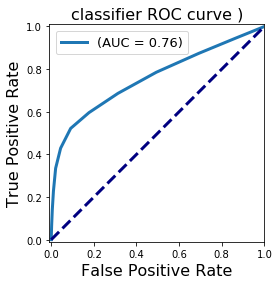

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 8  the class distribution
[205889 164711]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[75983 12259]
 [ 1871  1903]]

   Accuracy: 0.85

   Precision: 0.13

   Recall: 0.50

   F1: 0.21
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.86      0.91     88242
           1       0.13      0.50      0.21      3774

   micro avg       0.85      0.85      0.85     92016
   macro avg       0.56      0.68      0.56     92016
weighted avg       0.94      0.85      0.89     92016

Metric 
 0.50  0.21  0.13  0.85
 0.74


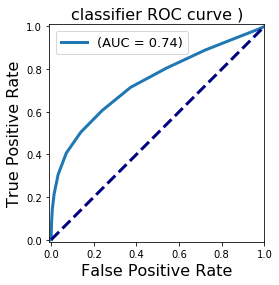

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 10  the class distribution
[205889 164711]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[77741 10501]
 [ 1810  1964]]

   Accuracy: 0.87

   Precision: 0.16

   Recall: 0.52

   F1: 0.24
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.88      0.93     88242
           1       0.16      0.52      0.24      3774

   micro avg       0.87      0.87      0.87     92016
   macro avg       0.57      0.70      0.58     92016
weighted avg       0.94      0.87      0.90     92016

Metric 
 0.52  0.24  0.16  0.87
 0.75


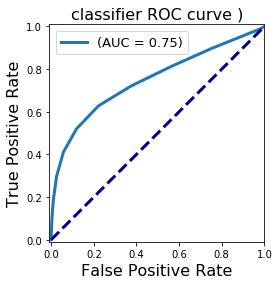

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 12  the class distribution
[205889 164711]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[75067 13175]
 [ 1628  2146]]

   Accuracy: 0.84

   Precision: 0.14

   Recall: 0.57

   F1: 0.22
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.85      0.91     88242
           1       0.14      0.57      0.22      3774

   micro avg       0.84      0.84      0.84     92016
   macro avg       0.56      0.71      0.57     92016
weighted avg       0.94      0.84      0.88     92016

Metric 
 0.57  0.22  0.14  0.84
 0.75


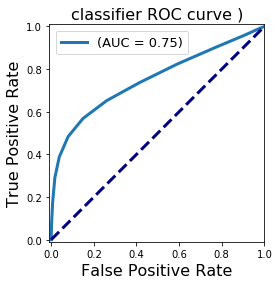

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 14  the class distribution
[205889 164711]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[73532 14710]
 [ 1571  2203]]

   Accuracy: 0.82

   Precision: 0.13

   Recall: 0.58

   F1: 0.21
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.83      0.90     88242
           1       0.13      0.58      0.21      3774

   micro avg       0.82      0.82      0.82     92016
   macro avg       0.55      0.71      0.56     92016
weighted avg       0.94      0.82      0.87     92016

Metric 
 0.58  0.21  0.13  0.82
 0.75


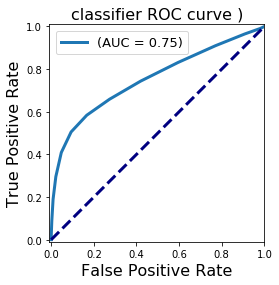

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 2  the class distribution
[205889 205889]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[79094  9148]
 [ 1910  1864]]

   Accuracy: 0.88

   Precision: 0.17

   Recall: 0.49

   F1: 0.25
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.90      0.93     88242
           1       0.17      0.49      0.25      3774

   micro avg       0.88      0.88      0.88     92016
   macro avg       0.57      0.70      0.59     92016
weighted avg       0.94      0.88      0.91     92016

Metric 
 0.49  0.25  0.17  0.88
 0.74


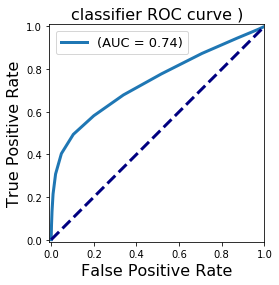

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 4  the class distribution
[205889 205889]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[77790 10452]
 [ 1700  2074]]

   Accuracy: 0.87

   Precision: 0.17

   Recall: 0.55

   F1: 0.25
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.88      0.93     88242
           1       0.17      0.55      0.25      3774

   micro avg       0.87      0.87      0.87     92016
   macro avg       0.57      0.72      0.59     92016
weighted avg       0.95      0.87      0.90     92016

Metric 
 0.55  0.25  0.17  0.87
 0.76


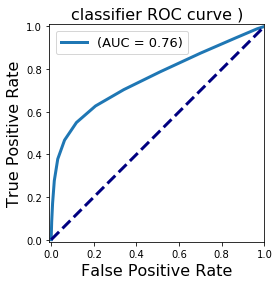

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 6  the class distribution
[205889 205889]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[75112 13130]
 [ 1645  2129]]

   Accuracy: 0.84

   Precision: 0.14

   Recall: 0.56

   F1: 0.22
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.85      0.91     88242
           1       0.14      0.56      0.22      3774

   micro avg       0.84      0.84      0.84     92016
   macro avg       0.56      0.71      0.57     92016
weighted avg       0.94      0.84      0.88     92016

Metric 
 0.56  0.22  0.14  0.84
 0.75


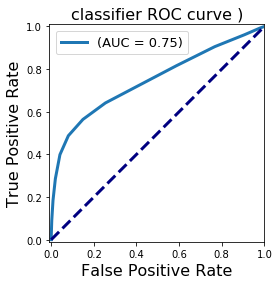

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 8  the class distribution
[205889 205889]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[79065  9177]
 [ 1846  1928]]

   Accuracy: 0.88

   Precision: 0.17

   Recall: 0.51

   F1: 0.26
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.90      0.93     88242
           1       0.17      0.51      0.26      3774

   micro avg       0.88      0.88      0.88     92016
   macro avg       0.58      0.70      0.60     92016
weighted avg       0.94      0.88      0.91     92016

Metric 
 0.51  0.26  0.17  0.88
 0.75


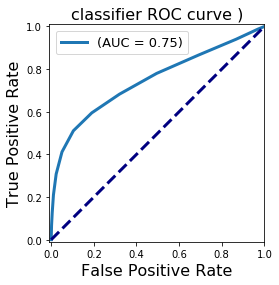

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 10  the class distribution
[205889 205889]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[77710 10532]
 [ 1770  2004]]

   Accuracy: 0.87

   Precision: 0.16

   Recall: 0.53

   F1: 0.25
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.88      0.93     88242
           1       0.16      0.53      0.25      3774

   micro avg       0.87      0.87      0.87     92016
   macro avg       0.57      0.71      0.59     92016
weighted avg       0.94      0.87      0.90     92016

Metric 
 0.53  0.25  0.16  0.87
 0.75


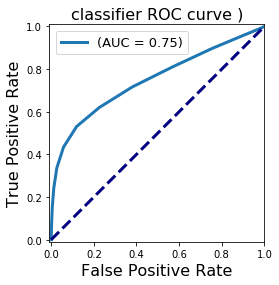

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 12  the class distribution
[205889 205889]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[70536 17706]
 [ 1518  2256]]

   Accuracy: 0.79

   Precision: 0.11

   Recall: 0.60

   F1: 0.19
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.80      0.88     88242
           1       0.11      0.60      0.19      3774

   micro avg       0.79      0.79      0.79     92016
   macro avg       0.55      0.70      0.54     92016
weighted avg       0.94      0.79      0.85     92016

Metric 
 0.60  0.19  0.11  0.79
 0.74


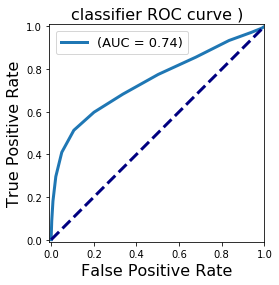

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 14  the class distribution
[205889 205889]
-------------------------------------------Random Forest--------------------------------------------
---Confusion Matrix---
 [[73062 15180]
 [ 1631  2143]]

   Accuracy: 0.82

   Precision: 0.12

   Recall: 0.57

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.83      0.90     88242
           1       0.12      0.57      0.20      3774

   micro avg       0.82      0.82      0.82     92016
   macro avg       0.55      0.70      0.55     92016
weighted avg       0.94      0.82      0.87     92016

Metric 
 0.57  0.20  0.12  0.82
 0.74


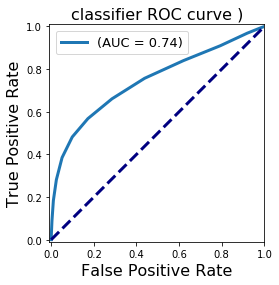

In [74]:
for i in [0.2,0.4,0.6,0.8,1]:
    for k in range(2,16,2):
        print("---------------------------------------------------------------------------------------------------")
        print("When the ratio between the majority and the minority is", i,"and neighbor is",k," the class distribution")
        X_resampled, y_resampled=smote_training_size_k(X=X_train,y=y_train,pro=i,k=k)
        print(np.bincount(y_resampled.astype(int)))
        print("-------------------------------------------Random Forest--------------------------------------------")
        forest_fit(X_resampled, y_resampled,X_test,y_test)

# SMOTE LR

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 2  the class distribution
[205889  41177]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[67231 21011]
 [ 1013  2761]]

   Accuracy: 0.76

   Precision: 0.12

   Recall: 0.73

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.76      0.86     88242
           1       0.12      0.73      0.20      3774

   micro avg       0.76      0.76      0.76     92016
   macro avg       0.55      0.75      0.53     92016
weighted avg       0.95      0.76      0.83     92016

Metric 
 0.73  0.20  0.12  0.76
 0.82


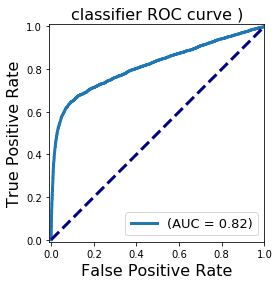

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 4  the class distribution
[205889  41177]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[66687 21555]
 [ 1005  2769]]

   Accuracy: 0.75

   Precision: 0.11

   Recall: 0.73

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.76      0.86     88242
           1       0.11      0.73      0.20      3774

   micro avg       0.75      0.75      0.75     92016
   macro avg       0.55      0.74      0.53     92016
weighted avg       0.95      0.75      0.83     92016

Metric 
 0.73  0.20  0.11  0.75
 0.82


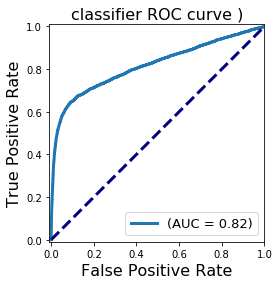

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 6  the class distribution
[205889  41177]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[66349 21893]
 [  998  2776]]

   Accuracy: 0.75

   Precision: 0.11

   Recall: 0.74

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.75      0.85     88242
           1       0.11      0.74      0.20      3774

   micro avg       0.75      0.75      0.75     92016
   macro avg       0.55      0.74      0.52     92016
weighted avg       0.95      0.75      0.83     92016

Metric 
 0.74  0.20  0.11  0.75
 0.82


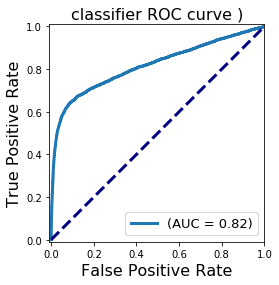

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 8  the class distribution
[205889  41177]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[66741 21501]
 [ 1006  2768]]

   Accuracy: 0.76

   Precision: 0.11

   Recall: 0.73

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.76      0.86     88242
           1       0.11      0.73      0.20      3774

   micro avg       0.76      0.76      0.76     92016
   macro avg       0.55      0.74      0.53     92016
weighted avg       0.95      0.76      0.83     92016

Metric 
 0.73  0.20  0.11  0.76
 0.82


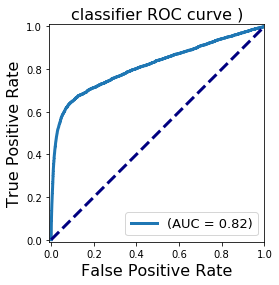

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 10  the class distribution
[205889  41177]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[66452 21790]
 [ 1001  2773]]

   Accuracy: 0.75

   Precision: 0.11

   Recall: 0.73

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.75      0.85     88242
           1       0.11      0.73      0.20      3774

   micro avg       0.75      0.75      0.75     92016
   macro avg       0.55      0.74      0.52     92016
weighted avg       0.95      0.75      0.83     92016

Metric 
 0.73  0.20  0.11  0.75
 0.82


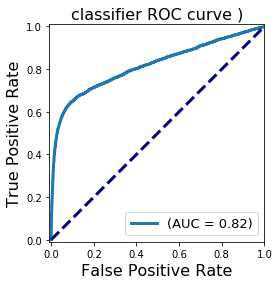

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 12  the class distribution
[205889  41177]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[66924 21318]
 [ 1012  2762]]

   Accuracy: 0.76

   Precision: 0.11

   Recall: 0.73

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.76      0.86     88242
           1       0.11      0.73      0.20      3774

   micro avg       0.76      0.76      0.76     92016
   macro avg       0.55      0.75      0.53     92016
weighted avg       0.95      0.76      0.83     92016

Metric 
 0.73  0.20  0.11  0.76
 0.82


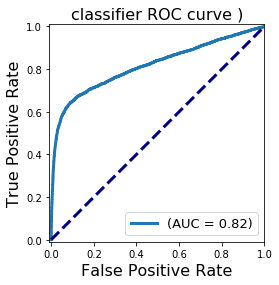

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 14  the class distribution
[205889  41177]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[65685 22557]
 [  985  2789]]

   Accuracy: 0.74

   Precision: 0.11

   Recall: 0.74

   F1: 0.19
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.74      0.85     88242
           1       0.11      0.74      0.19      3774

   micro avg       0.74      0.74      0.74     92016
   macro avg       0.55      0.74      0.52     92016
weighted avg       0.95      0.74      0.82     92016

Metric 
 0.74  0.19  0.11  0.74
 0.82


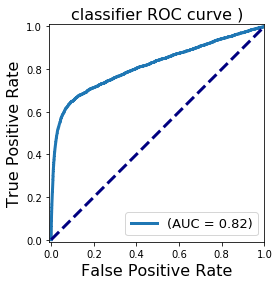

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 2  the class distribution
[205889  82355]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[44922 43320]
 [  608  3166]]

   Accuracy: 0.52

   Precision: 0.07

   Recall: 0.84

   F1: 0.13
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.51      0.67     88242
           1       0.07      0.84      0.13      3774

   micro avg       0.52      0.52      0.52     92016
   macro avg       0.53      0.67      0.40     92016
weighted avg       0.95      0.52      0.65     92016

Metric 
 0.84  0.13  0.07  0.52
 0.82


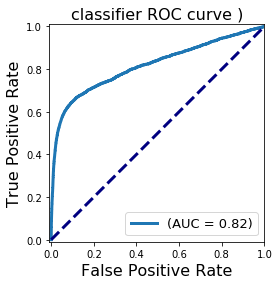

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 4  the class distribution
[205889  82355]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[44572 43670]
 [  603  3171]]

   Accuracy: 0.52

   Precision: 0.07

   Recall: 0.84

   F1: 0.13
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.51      0.67     88242
           1       0.07      0.84      0.13      3774

   micro avg       0.52      0.52      0.52     92016
   macro avg       0.53      0.67      0.40     92016
weighted avg       0.95      0.52      0.65     92016

Metric 
 0.84  0.13  0.07  0.52
 0.82


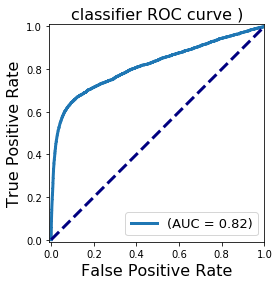

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 6  the class distribution
[205889  82355]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[44660 43582]
 [  605  3169]]

   Accuracy: 0.52

   Precision: 0.07

   Recall: 0.84

   F1: 0.13
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.51      0.67     88242
           1       0.07      0.84      0.13      3774

   micro avg       0.52      0.52      0.52     92016
   macro avg       0.53      0.67      0.40     92016
weighted avg       0.95      0.52      0.65     92016

Metric 
 0.84  0.13  0.07  0.52
 0.82


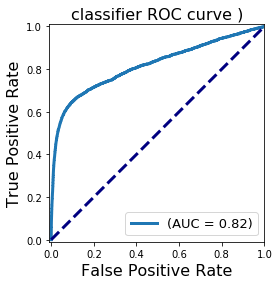

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 8  the class distribution
[205889  82355]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[45591 42651]
 [  621  3153]]

   Accuracy: 0.53

   Precision: 0.07

   Recall: 0.84

   F1: 0.13
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.52      0.68     88242
           1       0.07      0.84      0.13      3774

   micro avg       0.53      0.53      0.53     92016
   macro avg       0.53      0.68      0.40     92016
weighted avg       0.95      0.53      0.66     92016

Metric 
 0.84  0.13  0.07  0.53
 0.82


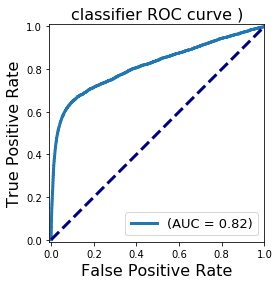

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 10  the class distribution
[205889  82355]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[44095 44147]
 [  596  3178]]

   Accuracy: 0.51

   Precision: 0.07

   Recall: 0.84

   F1: 0.12
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.50      0.66     88242
           1       0.07      0.84      0.12      3774

   micro avg       0.51      0.51      0.51     92016
   macro avg       0.53      0.67      0.39     92016
weighted avg       0.95      0.51      0.64     92016

Metric 
 0.84  0.12  0.07  0.51
 0.82


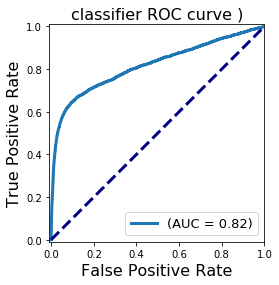

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 12  the class distribution
[205889  82355]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[45000 43242]
 [  611  3163]]

   Accuracy: 0.52

   Precision: 0.07

   Recall: 0.84

   F1: 0.13
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.51      0.67     88242
           1       0.07      0.84      0.13      3774

   micro avg       0.52      0.52      0.52     92016
   macro avg       0.53      0.67      0.40     92016
weighted avg       0.95      0.52      0.65     92016

Metric 
 0.84  0.13  0.07  0.52
 0.82


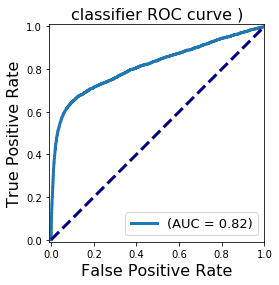

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 14  the class distribution
[205889  82355]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[43057 45185]
 [  581  3193]]

   Accuracy: 0.50

   Precision: 0.07

   Recall: 0.85

   F1: 0.12
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.49      0.65     88242
           1       0.07      0.85      0.12      3774

   micro avg       0.50      0.50      0.50     92016
   macro avg       0.53      0.67      0.39     92016
weighted avg       0.95      0.50      0.63     92016

Metric 
 0.85  0.12  0.07  0.50
 0.82


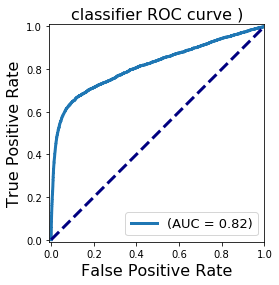

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 2  the class distribution
[205889 123533]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[31780 56462]
 [  420  3354]]

   Accuracy: 0.38

   Precision: 0.06

   Recall: 0.89

   F1: 0.11
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.36      0.53     88242
           1       0.06      0.89      0.11      3774

   micro avg       0.38      0.38      0.38     92016
   macro avg       0.52      0.62      0.32     92016
weighted avg       0.95      0.38      0.51     92016

Metric 
 0.89  0.11  0.06  0.38
 0.82


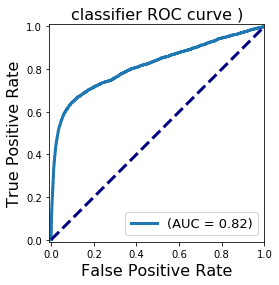

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 4  the class distribution
[205889 123533]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[30505 57737]
 [  399  3375]]

   Accuracy: 0.37

   Precision: 0.06

   Recall: 0.89

   F1: 0.10
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.35      0.51     88242
           1       0.06      0.89      0.10      3774

   micro avg       0.37      0.37      0.37     92016
   macro avg       0.52      0.62      0.31     92016
weighted avg       0.95      0.37      0.50     92016

Metric 
 0.89  0.10  0.06  0.37
 0.82


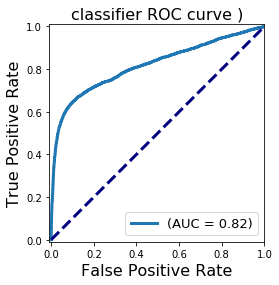

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 6  the class distribution
[205889 123533]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[30850 57392]
 [  407  3367]]

   Accuracy: 0.37

   Precision: 0.06

   Recall: 0.89

   F1: 0.10
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.35      0.52     88242
           1       0.06      0.89      0.10      3774

   micro avg       0.37      0.37      0.37     92016
   macro avg       0.52      0.62      0.31     92016
weighted avg       0.95      0.37      0.50     92016

Metric 
 0.89  0.10  0.06  0.37
 0.82


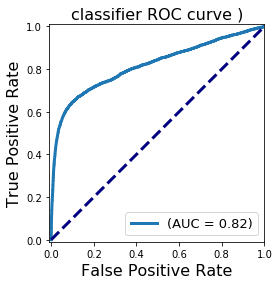

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 8  the class distribution
[205889 123533]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[31395 56847]
 [  415  3359]]

   Accuracy: 0.38

   Precision: 0.06

   Recall: 0.89

   F1: 0.11
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.36      0.52     88242
           1       0.06      0.89      0.11      3774

   micro avg       0.38      0.38      0.38     92016
   macro avg       0.52      0.62      0.31     92016
weighted avg       0.95      0.38      0.51     92016

Metric 
 0.89  0.11  0.06  0.38
 0.82


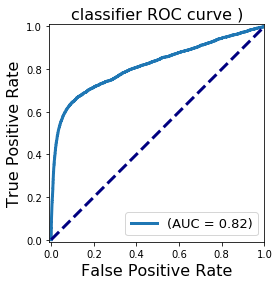

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 10  the class distribution
[205889 123533]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[30455 57787]
 [  402  3372]]

   Accuracy: 0.37

   Precision: 0.06

   Recall: 0.89

   F1: 0.10
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.35      0.51     88242
           1       0.06      0.89      0.10      3774

   micro avg       0.37      0.37      0.37     92016
   macro avg       0.52      0.62      0.31     92016
weighted avg       0.95      0.37      0.49     92016

Metric 
 0.89  0.10  0.06  0.37
 0.82


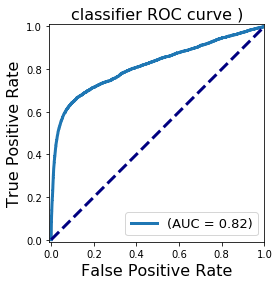

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 12  the class distribution
[205889 123533]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[30909 57333]
 [  410  3364]]

   Accuracy: 0.37

   Precision: 0.06

   Recall: 0.89

   F1: 0.10
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.35      0.52     88242
           1       0.06      0.89      0.10      3774

   micro avg       0.37      0.37      0.37     92016
   macro avg       0.52      0.62      0.31     92016
weighted avg       0.95      0.37      0.50     92016

Metric 
 0.89  0.10  0.06  0.37
 0.82


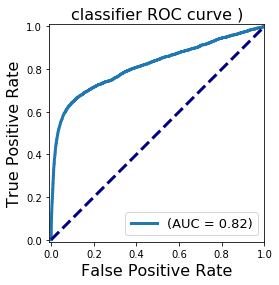

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 14  the class distribution
[205889 123533]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[30073 58169]
 [  395  3379]]

   Accuracy: 0.36

   Precision: 0.05

   Recall: 0.90

   F1: 0.10
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.34      0.51     88242
           1       0.05      0.90      0.10      3774

   micro avg       0.36      0.36      0.36     92016
   macro avg       0.52      0.62      0.31     92016
weighted avg       0.95      0.36      0.49     92016

Metric 
 0.90  0.10  0.05  0.36
 0.82


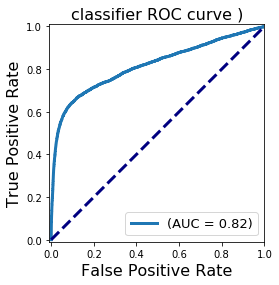

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 2  the class distribution
[205889 164711]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[21878 66364]
 [  266  3508]]

   Accuracy: 0.28

   Precision: 0.05

   Recall: 0.93

   F1: 0.10
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.25      0.40     88242
           1       0.05      0.93      0.10      3774

   micro avg       0.28      0.28      0.28     92016
   macro avg       0.52      0.59      0.25     92016
weighted avg       0.95      0.28      0.38     92016

Metric 
 0.93  0.10  0.05  0.28
 0.82


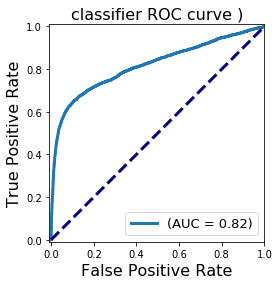

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 4  the class distribution
[205889 164711]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[21305 66937]
 [  257  3517]]

   Accuracy: 0.27

   Precision: 0.05

   Recall: 0.93

   F1: 0.09
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.24      0.39     88242
           1       0.05      0.93      0.09      3774

   micro avg       0.27      0.27      0.27     92016
   macro avg       0.52      0.59      0.24     92016
weighted avg       0.95      0.27      0.38     92016

Metric 
 0.93  0.09  0.05  0.27
 0.82


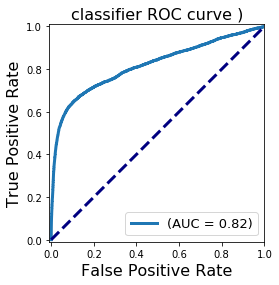

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 6  the class distribution
[205889 164711]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[21183 67059]
 [  257  3517]]

   Accuracy: 0.27

   Precision: 0.05

   Recall: 0.93

   F1: 0.09
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.24      0.39     88242
           1       0.05      0.93      0.09      3774

   micro avg       0.27      0.27      0.27     92016
   macro avg       0.52      0.59      0.24     92016
weighted avg       0.95      0.27      0.37     92016

Metric 
 0.93  0.09  0.05  0.27
 0.82


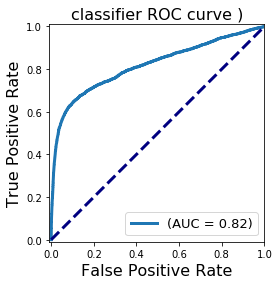

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 8  the class distribution
[205889 164711]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[21879 66363]
 [  269  3505]]

   Accuracy: 0.28

   Precision: 0.05

   Recall: 0.93

   F1: 0.10
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.25      0.40     88242
           1       0.05      0.93      0.10      3774

   micro avg       0.28      0.28      0.28     92016
   macro avg       0.52      0.59      0.25     92016
weighted avg       0.95      0.28      0.38     92016

Metric 
 0.93  0.10  0.05  0.28
 0.82


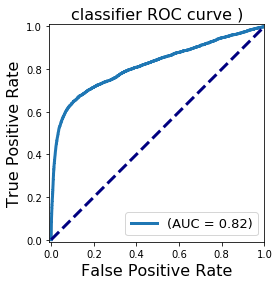

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 10  the class distribution
[205889 164711]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[20605 67637]
 [  251  3523]]

   Accuracy: 0.26

   Precision: 0.05

   Recall: 0.93

   F1: 0.09
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.23      0.38     88242
           1       0.05      0.93      0.09      3774

   micro avg       0.26      0.26      0.26     92016
   macro avg       0.52      0.58      0.24     92016
weighted avg       0.95      0.26      0.37     92016

Metric 
 0.93  0.09  0.05  0.26
 0.82


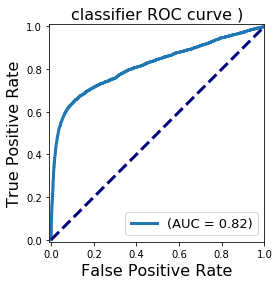

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 12  the class distribution
[205889 164711]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[21194 67048]
 [  263  3511]]

   Accuracy: 0.27

   Precision: 0.05

   Recall: 0.93

   F1: 0.09
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.24      0.39     88242
           1       0.05      0.93      0.09      3774

   micro avg       0.27      0.27      0.27     92016
   macro avg       0.52      0.59      0.24     92016
weighted avg       0.95      0.27      0.37     92016

Metric 
 0.93  0.09  0.05  0.27
 0.82


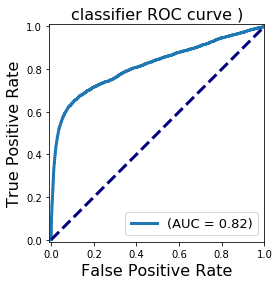

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 14  the class distribution
[205889 164711]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[20641 67601]
 [  253  3521]]

   Accuracy: 0.26

   Precision: 0.05

   Recall: 0.93

   F1: 0.09
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.23      0.38     88242
           1       0.05      0.93      0.09      3774

   micro avg       0.26      0.26      0.26     92016
   macro avg       0.52      0.58      0.24     92016
weighted avg       0.95      0.26      0.37     92016

Metric 
 0.93  0.09  0.05  0.26
 0.82


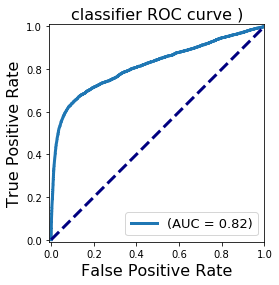

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 2  the class distribution
[205889 205889]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[15089 73153]
 [  173  3601]]

   Accuracy: 0.20

   Precision: 0.05

   Recall: 0.95

   F1: 0.09
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.17      0.29     88242
           1       0.05      0.95      0.09      3774

   micro avg       0.20      0.20      0.20     92016
   macro avg       0.52      0.56      0.19     92016
weighted avg       0.95      0.20      0.28     92016

Metric 
 0.95  0.09  0.05  0.20
 0.82


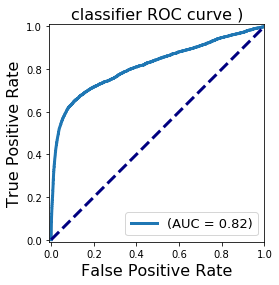

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 4  the class distribution
[205889 205889]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[14839 73403]
 [  167  3607]]

   Accuracy: 0.20

   Precision: 0.05

   Recall: 0.96

   F1: 0.09
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.17      0.29     88242
           1       0.05      0.96      0.09      3774

   micro avg       0.20      0.20      0.20     92016
   macro avg       0.52      0.56      0.19     92016
weighted avg       0.95      0.20      0.28     92016

Metric 
 0.96  0.09  0.05  0.20
 0.82


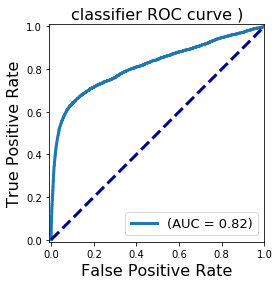

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 6  the class distribution
[205889 205889]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[14405 73837]
 [  161  3613]]

   Accuracy: 0.20

   Precision: 0.05

   Recall: 0.96

   F1: 0.09
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.16      0.28     88242
           1       0.05      0.96      0.09      3774

   micro avg       0.20      0.20      0.20     92016
   macro avg       0.52      0.56      0.18     92016
weighted avg       0.95      0.20      0.27     92016

Metric 
 0.96  0.09  0.05  0.20
 0.82


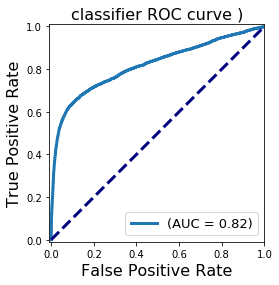

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 8  the class distribution
[205889 205889]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[15099 73143]
 [  168  3606]]

   Accuracy: 0.20

   Precision: 0.05

   Recall: 0.96

   F1: 0.09
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.17      0.29     88242
           1       0.05      0.96      0.09      3774

   micro avg       0.20      0.20      0.20     92016
   macro avg       0.52      0.56      0.19     92016
weighted avg       0.95      0.20      0.28     92016

Metric 
 0.96  0.09  0.05  0.20
 0.82


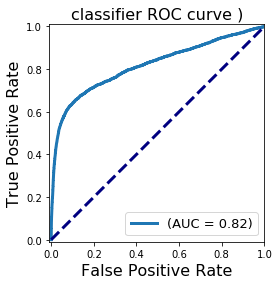

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 10  the class distribution
[205889 205889]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[14191 74051]
 [  160  3614]]

   Accuracy: 0.19

   Precision: 0.05

   Recall: 0.96

   F1: 0.09
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.16      0.28     88242
           1       0.05      0.96      0.09      3774

   micro avg       0.19      0.19      0.19     92016
   macro avg       0.52      0.56      0.18     92016
weighted avg       0.95      0.19      0.27     92016

Metric 
 0.96  0.09  0.05  0.19
 0.82


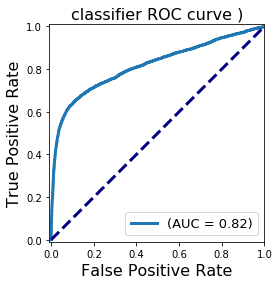

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 12  the class distribution
[205889 205889]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[14367 73875]
 [  160  3614]]

   Accuracy: 0.20

   Precision: 0.05

   Recall: 0.96

   F1: 0.09
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.16      0.28     88242
           1       0.05      0.96      0.09      3774

   micro avg       0.20      0.20      0.20     92016
   macro avg       0.52      0.56      0.18     92016
weighted avg       0.95      0.20      0.27     92016

Metric 
 0.96  0.09  0.05  0.20
 0.82


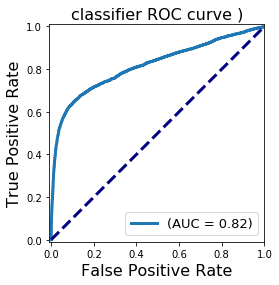

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 14  the class distribution
[205889 205889]
--------------------------------------------Logistic Regression---------------------------------------
---Confusion Matrix---
 [[13664 74578]
 [  158  3616]]

   Accuracy: 0.19

   Precision: 0.05

   Recall: 0.96

   F1: 0.09
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.15      0.27     88242
           1       0.05      0.96      0.09      3774

   micro avg       0.19      0.19      0.19     92016
   macro avg       0.52      0.56      0.18     92016
weighted avg       0.95      0.19      0.26     92016

Metric 
 0.96  0.09  0.05  0.19
 0.82


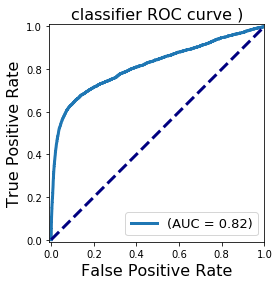

In [69]:
for i in [0.2,0.4,0.6,0.8,1]:
    for k in range(2,16,2):
        print("---------------------------------------------------------------------------------------------------")
        print("When the ratio between the majority and the minority is", i,"and neighbor is",k," the class distribution")
        X_resampled, y_resampled=smote_training_size_k(X=X_train,y=y_train,pro=i,k=k)
        print(np.bincount(y_resampled.astype(int)))
        print("--------------------------------------------Logistic Regression---------------------------------------")
        lr_fit(X_resampled, y_resampled,X_test,y_test)

# SMOTE SVM 
#SVM with SMOTE resampling strategy--time consuming (not done)

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 2  the class distribution
[205889  41177]
--------------------------------------------Support Vector Machine-------------------------------------
---Confusion Matrix---
 [[79580  8662]
 [ 1291  2483]]

   Accuracy: 0.89

   Precision: 0.22

   Recall: 0.66

   F1: 0.33
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.90      0.94     88242
           1       0.22      0.66      0.33      3774

   micro avg       0.89      0.89      0.89     92016
   macro avg       0.60      0.78      0.64     92016
weighted avg       0.95      0.89      0.92     92016

Metric 
 0.66  0.33  0.22  0.89
 0.82


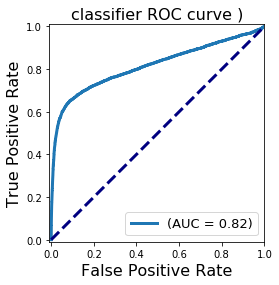

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 4  the class distribution
[205889  41177]
--------------------------------------------Support Vector Machine-------------------------------------


In [ ]:
for i in [0.2,0.4,0.6,0.8,1]:
    for k in range(2,16,2):
        print("---------------------------------------------------------------------------------------------------")
        print("When the ratio between the majority and the minority is", i,"and neighbor is",k," the class distribution")
        X_resampled, y_resampled=smote_training_size_k(X=X_train,y=y_train,pro=i,k=k)
        print(np.bincount(y_resampled.astype(int)))
        print("--------------------------------------------Support Vector Machine-------------------------------------")
        svm_rbf_fit(X_resampled, y_resampled,X_test,y_test)

# SMOTE NB

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 2  the class distribution
[205889  41177]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[67277 20965]
 [ 1067  2707]]

   Accuracy: 0.76

   Precision: 0.11

   Recall: 0.72

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.76      0.86     88242
           1       0.11      0.72      0.20      3774

   micro avg       0.76      0.76      0.76     92016
   macro avg       0.55      0.74      0.53     92016
weighted avg       0.95      0.76      0.83     92016

Metric 
 0.72  0.20  0.11  0.76
 0.80


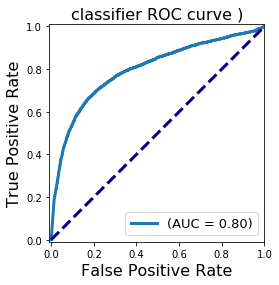

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 4  the class distribution
[205889  41177]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[66692 21550]
 [ 1052  2722]]

   Accuracy: 0.75

   Precision: 0.11

   Recall: 0.72

   F1: 0.19
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.76      0.86     88242
           1       0.11      0.72      0.19      3774

   micro avg       0.75      0.75      0.75     92016
   macro avg       0.55      0.74      0.52     92016
weighted avg       0.95      0.75      0.83     92016

Metric 
 0.72  0.19  0.11  0.75
 0.80


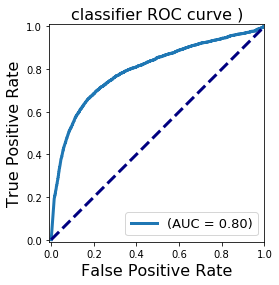

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 6  the class distribution
[205889  41177]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[67253 20989]
 [ 1063  2711]]

   Accuracy: 0.76

   Precision: 0.11

   Recall: 0.72

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.76      0.86     88242
           1       0.11      0.72      0.20      3774

   micro avg       0.76      0.76      0.76     92016
   macro avg       0.55      0.74      0.53     92016
weighted avg       0.95      0.76      0.83     92016

Metric 
 0.72  0.20  0.11  0.76
 0.80


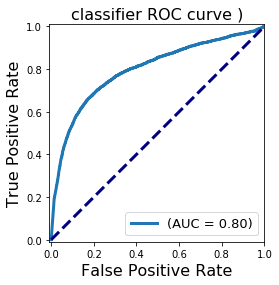

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 8  the class distribution
[205889  41177]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[67857 20385]
 [ 1086  2688]]

   Accuracy: 0.77

   Precision: 0.12

   Recall: 0.71

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.77      0.86     88242
           1       0.12      0.71      0.20      3774

   micro avg       0.77      0.77      0.77     92016
   macro avg       0.55      0.74      0.53     92016
weighted avg       0.95      0.77      0.84     92016

Metric 
 0.71  0.20  0.12  0.77
 0.80


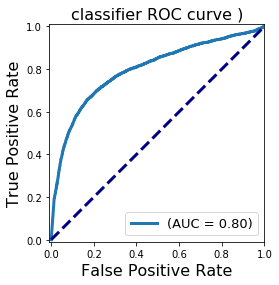

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 10  the class distribution
[205889  41177]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[67093 21149]
 [ 1063  2711]]

   Accuracy: 0.76

   Precision: 0.11

   Recall: 0.72

   F1: 0.20
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.76      0.86     88242
           1       0.11      0.72      0.20      3774

   micro avg       0.76      0.76      0.76     92016
   macro avg       0.55      0.74      0.53     92016
weighted avg       0.95      0.76      0.83     92016

Metric 
 0.72  0.20  0.11  0.76
 0.80


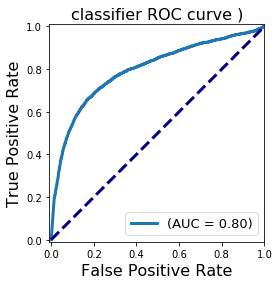

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 12  the class distribution
[205889  41177]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[66838 21404]
 [ 1054  2720]]

   Accuracy: 0.76

   Precision: 0.11

   Recall: 0.72

   F1: 0.19
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.76      0.86     88242
           1       0.11      0.72      0.19      3774

   micro avg       0.76      0.76      0.76     92016
   macro avg       0.55      0.74      0.53     92016
weighted avg       0.95      0.76      0.83     92016

Metric 
 0.72  0.19  0.11  0.76
 0.80


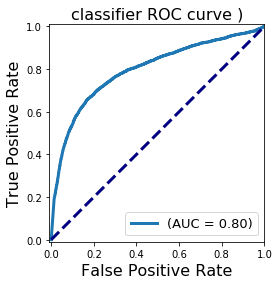

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 14  the class distribution
[205889  41177]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[66579 21663]
 [ 1049  2725]]

   Accuracy: 0.75

   Precision: 0.11

   Recall: 0.72

   F1: 0.19
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.75      0.85     88242
           1       0.11      0.72      0.19      3774

   micro avg       0.75      0.75      0.75     92016
   macro avg       0.55      0.74      0.52     92016
weighted avg       0.95      0.75      0.83     92016

Metric 
 0.72  0.19  0.11  0.75
 0.80


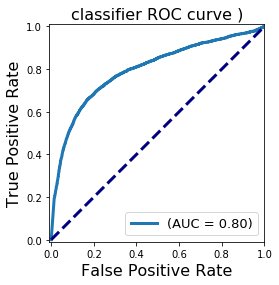

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 2  the class distribution
[205889  82355]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[64721 23521]
 [  983  2791]]

   Accuracy: 0.73

   Precision: 0.11

   Recall: 0.74

   F1: 0.19
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.73      0.84     88242
           1       0.11      0.74      0.19      3774

   micro avg       0.73      0.73      0.73     92016
   macro avg       0.55      0.74      0.51     92016
weighted avg       0.95      0.73      0.81     92016

Metric 
 0.74  0.19  0.11  0.73
 0.80


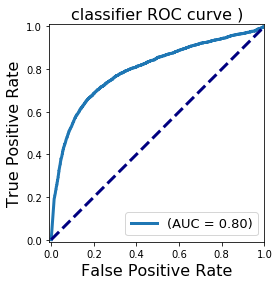

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 4  the class distribution
[205889  82355]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[65216 23026]
 [ 1000  2774]]

   Accuracy: 0.74

   Precision: 0.11

   Recall: 0.74

   F1: 0.19
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.74      0.84     88242
           1       0.11      0.74      0.19      3774

   micro avg       0.74      0.74      0.74     92016
   macro avg       0.55      0.74      0.52     92016
weighted avg       0.95      0.74      0.82     92016

Metric 
 0.74  0.19  0.11  0.74
 0.80


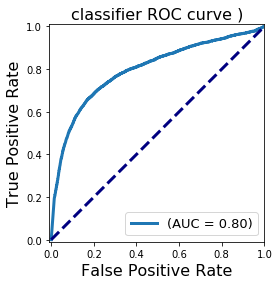

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 6  the class distribution
[205889  82355]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[63921 24321]
 [  960  2814]]

   Accuracy: 0.73

   Precision: 0.10

   Recall: 0.75

   F1: 0.18
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.72      0.83     88242
           1       0.10      0.75      0.18      3774

   micro avg       0.73      0.73      0.73     92016
   macro avg       0.54      0.74      0.51     92016
weighted avg       0.95      0.73      0.81     92016

Metric 
 0.75  0.18  0.10  0.73
 0.80


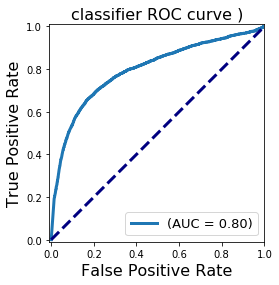

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 8  the class distribution
[205889  82355]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[65083 23159]
 [ 1001  2773]]

   Accuracy: 0.74

   Precision: 0.11

   Recall: 0.73

   F1: 0.19
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.74      0.84     88242
           1       0.11      0.73      0.19      3774

   micro avg       0.74      0.74      0.74     92016
   macro avg       0.55      0.74      0.52     92016
weighted avg       0.95      0.74      0.82     92016

Metric 
 0.73  0.19  0.11  0.74
 0.80


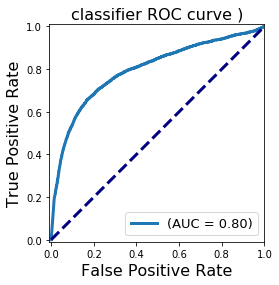

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 10  the class distribution
[205889  82355]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[64929 23313]
 [  997  2777]]

   Accuracy: 0.74

   Precision: 0.11

   Recall: 0.74

   F1: 0.19
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.74      0.84     88242
           1       0.11      0.74      0.19      3774

   micro avg       0.74      0.74      0.74     92016
   macro avg       0.55      0.74      0.51     92016
weighted avg       0.95      0.74      0.82     92016

Metric 
 0.74  0.19  0.11  0.74
 0.80


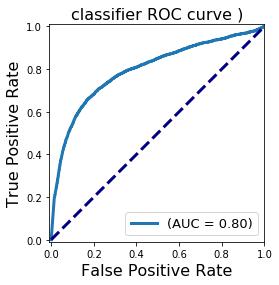

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 12  the class distribution
[205889  82355]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[64823 23419]
 [  992  2782]]

   Accuracy: 0.73

   Precision: 0.11

   Recall: 0.74

   F1: 0.19
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.73      0.84     88242
           1       0.11      0.74      0.19      3774

   micro avg       0.73      0.73      0.73     92016
   macro avg       0.55      0.74      0.51     92016
weighted avg       0.95      0.73      0.81     92016

Metric 
 0.74  0.19  0.11  0.73
 0.80


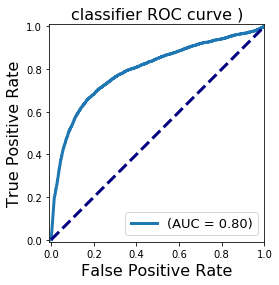

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 14  the class distribution
[205889  82355]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[64855 23387]
 [  993  2781]]

   Accuracy: 0.74

   Precision: 0.11

   Recall: 0.74

   F1: 0.19
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.73      0.84     88242
           1       0.11      0.74      0.19      3774

   micro avg       0.74      0.74      0.74     92016
   macro avg       0.55      0.74      0.51     92016
weighted avg       0.95      0.74      0.81     92016

Metric 
 0.74  0.19  0.11  0.74
 0.80


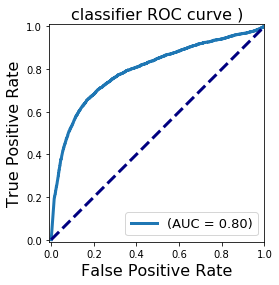

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 2  the class distribution
[205889 123533]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[63576 24666]
 [  948  2826]]

   Accuracy: 0.72

   Precision: 0.10

   Recall: 0.75

   F1: 0.18
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.72      0.83     88242
           1       0.10      0.75      0.18      3774

   micro avg       0.72      0.72      0.72     92016
   macro avg       0.54      0.73      0.51     92016
weighted avg       0.95      0.72      0.81     92016

Metric 
 0.75  0.18  0.10  0.72
 0.80


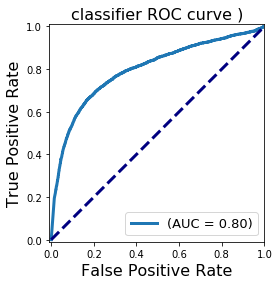

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 4  the class distribution
[205889 123533]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[62593 25649]
 [  919  2855]]

   Accuracy: 0.71

   Precision: 0.10

   Recall: 0.76

   F1: 0.18
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.71      0.82     88242
           1       0.10      0.76      0.18      3774

   micro avg       0.71      0.71      0.71     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.71      0.80     92016

Metric 
 0.76  0.18  0.10  0.71
 0.80


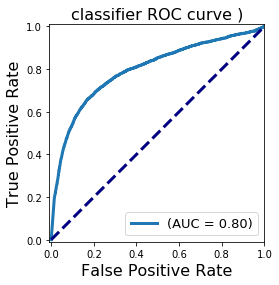

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 6  the class distribution
[205889 123533]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[63137 25105]
 [  933  2841]]

   Accuracy: 0.72

   Precision: 0.10

   Recall: 0.75

   F1: 0.18
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.72      0.83     88242
           1       0.10      0.75      0.18      3774

   micro avg       0.72      0.72      0.72     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.72      0.80     92016

Metric 
 0.75  0.18  0.10  0.72
 0.80


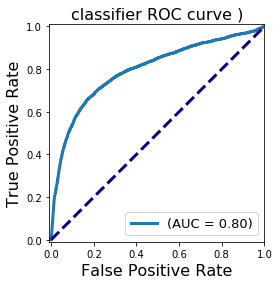

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 8  the class distribution
[205889 123533]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[63158 25084]
 [  936  2838]]

   Accuracy: 0.72

   Precision: 0.10

   Recall: 0.75

   F1: 0.18
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.72      0.83     88242
           1       0.10      0.75      0.18      3774

   micro avg       0.72      0.72      0.72     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.72      0.80     92016

Metric 
 0.75  0.18  0.10  0.72
 0.80


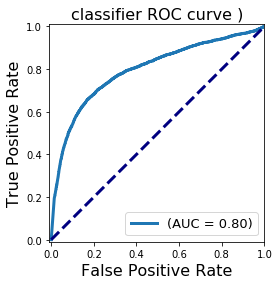

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 10  the class distribution
[205889 123533]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[63449 24793]
 [  948  2826]]

   Accuracy: 0.72

   Precision: 0.10

   Recall: 0.75

   F1: 0.18
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.72      0.83     88242
           1       0.10      0.75      0.18      3774

   micro avg       0.72      0.72      0.72     92016
   macro avg       0.54      0.73      0.51     92016
weighted avg       0.95      0.72      0.80     92016

Metric 
 0.75  0.18  0.10  0.72
 0.80


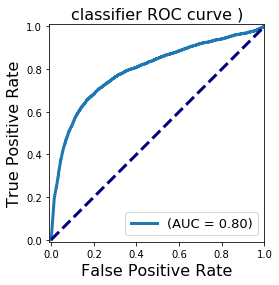

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 12  the class distribution
[205889 123533]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[62876 25366]
 [  929  2845]]

   Accuracy: 0.71

   Precision: 0.10

   Recall: 0.75

   F1: 0.18
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.71      0.83     88242
           1       0.10      0.75      0.18      3774

   micro avg       0.71      0.71      0.71     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.71      0.80     92016

Metric 
 0.75  0.18  0.10  0.71
 0.80


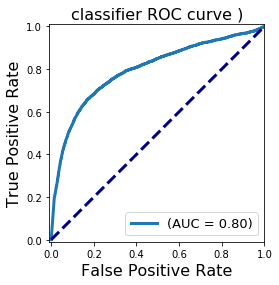

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 14  the class distribution
[205889 123533]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[62653 25589]
 [  923  2851]]

   Accuracy: 0.71

   Precision: 0.10

   Recall: 0.76

   F1: 0.18
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.71      0.83     88242
           1       0.10      0.76      0.18      3774

   micro avg       0.71      0.71      0.71     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.71      0.80     92016

Metric 
 0.76  0.18  0.10  0.71
 0.80


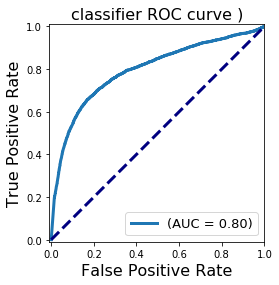

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 2  the class distribution
[205889 164711]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[61792 26450]
 [  890  2884]]

   Accuracy: 0.70

   Precision: 0.10

   Recall: 0.76

   F1: 0.17
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.70      0.82     88242
           1       0.10      0.76      0.17      3774

   micro avg       0.70      0.70      0.70     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.70      0.79     92016

Metric 
 0.76  0.17  0.10  0.70
 0.80


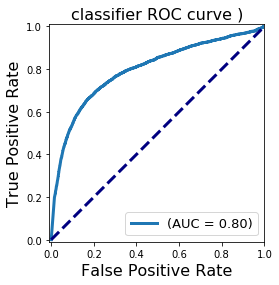

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 4  the class distribution
[205889 164711]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[61686 26556]
 [  887  2887]]

   Accuracy: 0.70

   Precision: 0.10

   Recall: 0.76

   F1: 0.17
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.70      0.82     88242
           1       0.10      0.76      0.17      3774

   micro avg       0.70      0.70      0.70     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.70      0.79     92016

Metric 
 0.76  0.17  0.10  0.70
 0.80


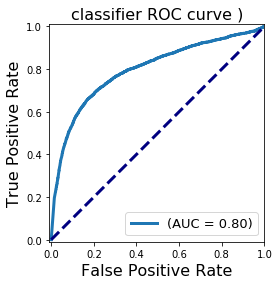

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 6  the class distribution
[205889 164711]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[62451 25791]
 [  913  2861]]

   Accuracy: 0.71

   Precision: 0.10

   Recall: 0.76

   F1: 0.18
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.71      0.82     88242
           1       0.10      0.76      0.18      3774

   micro avg       0.71      0.71      0.71     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.71      0.80     92016

Metric 
 0.76  0.18  0.10  0.71
 0.80


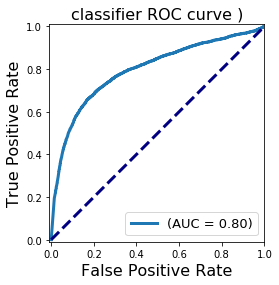

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 8  the class distribution
[205889 164711]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[62173 26069]
 [  910  2864]]

   Accuracy: 0.71

   Precision: 0.10

   Recall: 0.76

   F1: 0.18
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.70      0.82     88242
           1       0.10      0.76      0.18      3774

   micro avg       0.71      0.71      0.71     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.71      0.80     92016

Metric 
 0.76  0.18  0.10  0.71
 0.80


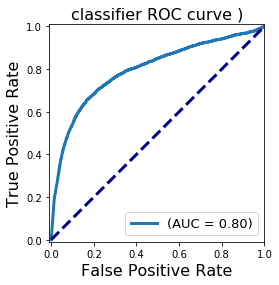

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 10  the class distribution
[205889 164711]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[62182 26060]
 [  908  2866]]

   Accuracy: 0.71

   Precision: 0.10

   Recall: 0.76

   F1: 0.18
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.70      0.82     88242
           1       0.10      0.76      0.18      3774

   micro avg       0.71      0.71      0.71     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.71      0.80     92016

Metric 
 0.76  0.18  0.10  0.71
 0.80


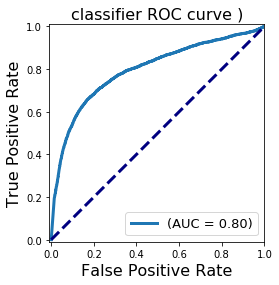

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 12  the class distribution
[205889 164711]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[62778 25464]
 [  930  2844]]

   Accuracy: 0.71

   Precision: 0.10

   Recall: 0.75

   F1: 0.18
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.71      0.83     88242
           1       0.10      0.75      0.18      3774

   micro avg       0.71      0.71      0.71     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.71      0.80     92016

Metric 
 0.75  0.18  0.10  0.71
 0.80


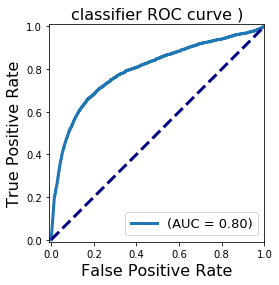

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 14  the class distribution
[205889 164711]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[62015 26227]
 [  910  2864]]

   Accuracy: 0.71

   Precision: 0.10

   Recall: 0.76

   F1: 0.17
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.70      0.82     88242
           1       0.10      0.76      0.17      3774

   micro avg       0.71      0.71      0.71     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.71      0.79     92016

Metric 
 0.76  0.17  0.10  0.71
 0.80


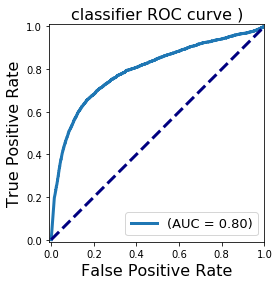

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 2  the class distribution
[205889 205889]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[61586 26656]
 [  881  2893]]

   Accuracy: 0.70

   Precision: 0.10

   Recall: 0.77

   F1: 0.17
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.70      0.82     88242
           1       0.10      0.77      0.17      3774

   micro avg       0.70      0.70      0.70     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.70      0.79     92016

Metric 
 0.77  0.17  0.10  0.70
 0.80


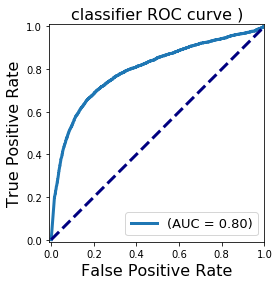

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 4  the class distribution
[205889 205889]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[60883 27359]
 [  870  2904]]

   Accuracy: 0.69

   Precision: 0.10

   Recall: 0.77

   F1: 0.17
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.69      0.81     88242
           1       0.10      0.77      0.17      3774

   micro avg       0.69      0.69      0.69     92016
   macro avg       0.54      0.73      0.49     92016
weighted avg       0.95      0.69      0.79     92016

Metric 
 0.77  0.17  0.10  0.69
 0.80


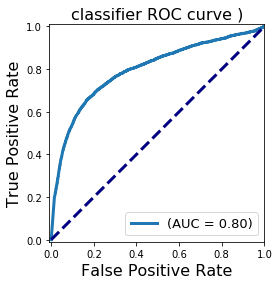

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 6  the class distribution
[205889 205889]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[61390 26852]
 [  882  2892]]

   Accuracy: 0.70

   Precision: 0.10

   Recall: 0.77

   F1: 0.17
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.70      0.82     88242
           1       0.10      0.77      0.17      3774

   micro avg       0.70      0.70      0.70     92016
   macro avg       0.54      0.73      0.49     92016
weighted avg       0.95      0.70      0.79     92016

Metric 
 0.77  0.17  0.10  0.70
 0.80


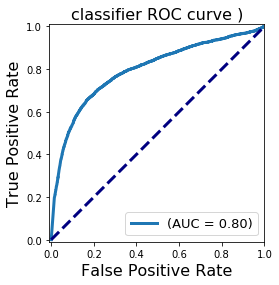

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 8  the class distribution
[205889 205889]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[61181 27061]
 [  881  2893]]

   Accuracy: 0.70

   Precision: 0.10

   Recall: 0.77

   F1: 0.17
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.69      0.81     88242
           1       0.10      0.77      0.17      3774

   micro avg       0.70      0.70      0.70     92016
   macro avg       0.54      0.73      0.49     92016
weighted avg       0.95      0.70      0.79     92016

Metric 
 0.77  0.17  0.10  0.70
 0.80


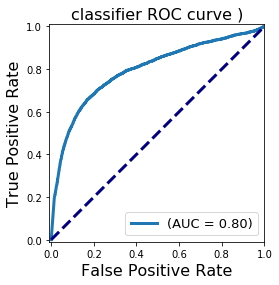

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 10  the class distribution
[205889 205889]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[61159 27083]
 [  881  2893]]

   Accuracy: 0.70

   Precision: 0.10

   Recall: 0.77

   F1: 0.17
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.69      0.81     88242
           1       0.10      0.77      0.17      3774

   micro avg       0.70      0.70      0.70     92016
   macro avg       0.54      0.73      0.49     92016
weighted avg       0.95      0.70      0.79     92016

Metric 
 0.77  0.17  0.10  0.70
 0.80


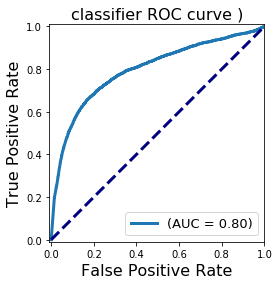

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 12  the class distribution
[205889 205889]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[61722 26520]
 [  904  2870]]

   Accuracy: 0.70

   Precision: 0.10

   Recall: 0.76

   F1: 0.17
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.70      0.82     88242
           1       0.10      0.76      0.17      3774

   micro avg       0.70      0.70      0.70     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.70      0.79     92016

Metric 
 0.76  0.17  0.10  0.70
 0.80


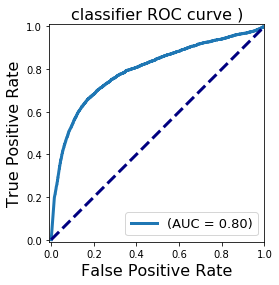

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 14  the class distribution
[205889 205889]
--------------------------------------------Gaussian Naive Bayes-------------------------------------
---Confusion Matrix---
 [[61356 26886]
 [  896  2878]]

   Accuracy: 0.70

   Precision: 0.10

   Recall: 0.76

   F1: 0.17
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.70      0.82     88242
           1       0.10      0.76      0.17      3774

   micro avg       0.70      0.70      0.70     92016
   macro avg       0.54      0.73      0.49     92016
weighted avg       0.95      0.70      0.79     92016

Metric 
 0.76  0.17  0.10  0.70
 0.80


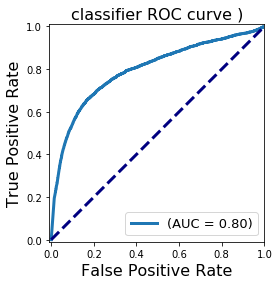

In [73]:
for i in [0.2,0.4,0.6,0.8,1]:
    for k in range(2,16,2):
        print("---------------------------------------------------------------------------------------------------")
        print("When the ratio between the majority and the minority is", i,"and neighbor is",k," the class distribution")
        X_resampled, y_resampled=smote_training_size_k(X=X_train,y=y_train,pro=i,k=k)
        print(np.bincount(y_resampled.astype(int)))
        print("--------------------------------------------Gaussian Naive Bayes-------------------------------------")
        nb_fit(X_resampled, y_resampled,X_test,y_test)

# SMOTE GBT

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 2  the class distribution
[205889  41177]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[74290 13952]
 [ 1248  2526]]

   Accuracy: 0.83

   Precision: 0.15

   Recall: 0.67

   F1: 0.25
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.84      0.91     88242
           1       0.15      0.67      0.25      3774

   micro avg       0.83      0.83      0.83     92016
   macro avg       0.57      0.76      0.58     92016
weighted avg       0.95      0.83      0.88     92016

Metric 
 0.67  0.25  0.15  0.83
 0.80


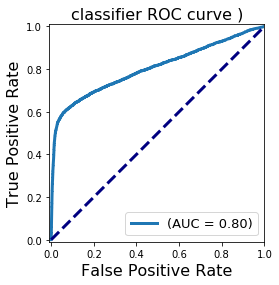

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 4  the class distribution
[205889  41177]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[76208 12034]
 [ 1280  2494]]

   Accuracy: 0.86

   Precision: 0.17

   Recall: 0.66

   F1: 0.27
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.86      0.92     88242
           1       0.17      0.66      0.27      3774

   micro avg       0.86      0.86      0.86     92016
   macro avg       0.58      0.76      0.60     92016
weighted avg       0.95      0.86      0.89     92016

Metric 
 0.66  0.27  0.17  0.86
 0.81


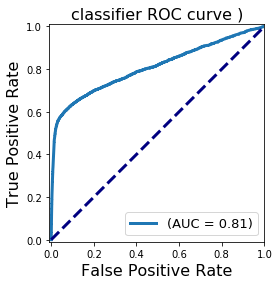

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 6  the class distribution
[205889  41177]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[78525  9717]
 [ 1385  2389]]

   Accuracy: 0.88

   Precision: 0.20

   Recall: 0.63

   F1: 0.30
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.89      0.93     88242
           1       0.20      0.63      0.30      3774

   micro avg       0.88      0.88      0.88     92016
   macro avg       0.59      0.76      0.62     92016
weighted avg       0.95      0.88      0.91     92016

Metric 
 0.63  0.30  0.20  0.88
 0.81


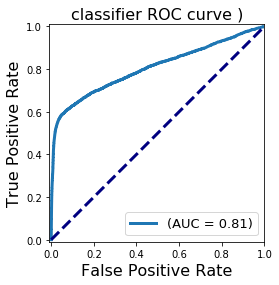

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 8  the class distribution
[205889  41177]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[77535 10707]
 [ 1323  2451]]

   Accuracy: 0.87

   Precision: 0.19

   Recall: 0.65

   F1: 0.29
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.88      0.93     88242
           1       0.19      0.65      0.29      3774

   micro avg       0.87      0.87      0.87     92016
   macro avg       0.58      0.76      0.61     92016
weighted avg       0.95      0.87      0.90     92016

Metric 
 0.65  0.29  0.19  0.87
 0.80


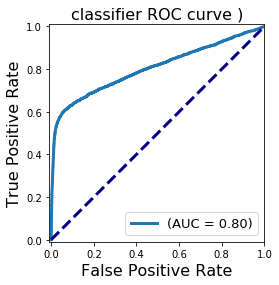

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 10  the class distribution
[205889  41177]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[75628 12614]
 [ 1293  2481]]

   Accuracy: 0.85

   Precision: 0.16

   Recall: 0.66

   F1: 0.26
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.86      0.92     88242
           1       0.16      0.66      0.26      3774

   micro avg       0.85      0.85      0.85     92016
   macro avg       0.57      0.76      0.59     92016
weighted avg       0.95      0.85      0.89     92016

Metric 
 0.66  0.26  0.16  0.85
 0.81


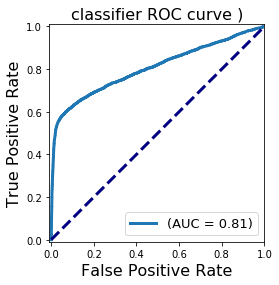

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 12  the class distribution
[205889  41177]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[77760 10482]
 [ 1320  2454]]

   Accuracy: 0.87

   Precision: 0.19

   Recall: 0.65

   F1: 0.29
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.88      0.93     88242
           1       0.19      0.65      0.29      3774

   micro avg       0.87      0.87      0.87     92016
   macro avg       0.59      0.77      0.61     92016
weighted avg       0.95      0.87      0.90     92016

Metric 
 0.65  0.29  0.19  0.87
 0.81


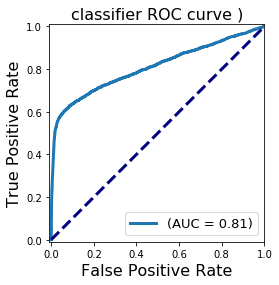

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.2 and neighbor is 14  the class distribution
[205889  41177]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[78780  9462]
 [ 1347  2427]]

   Accuracy: 0.88

   Precision: 0.20

   Recall: 0.64

   F1: 0.31
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.89      0.94     88242
           1       0.20      0.64      0.31      3774

   micro avg       0.88      0.88      0.88     92016
   macro avg       0.59      0.77      0.62     92016
weighted avg       0.95      0.88      0.91     92016

Metric 
 0.64  0.31  0.20  0.88
 0.81


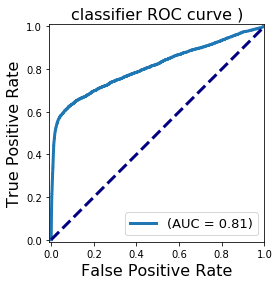

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 2  the class distribution
[205889  82355]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[65956 22286]
 [ 1050  2724]]

   Accuracy: 0.75

   Precision: 0.11

   Recall: 0.72

   F1: 0.19
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.75      0.85     88242
           1       0.11      0.72      0.19      3774

   micro avg       0.75      0.75      0.75     92016
   macro avg       0.55      0.73      0.52     92016
weighted avg       0.95      0.75      0.82     92016

Metric 
 0.72  0.19  0.11  0.75
 0.81


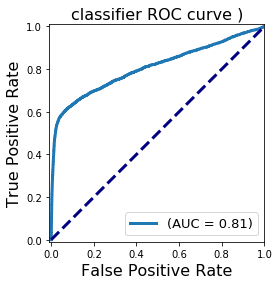

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 4  the class distribution
[205889  82355]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[69147 19095]
 [ 1116  2658]]

   Accuracy: 0.78

   Precision: 0.12

   Recall: 0.70

   F1: 0.21
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.78      0.87     88242
           1       0.12      0.70      0.21      3774

   micro avg       0.78      0.78      0.78     92016
   macro avg       0.55      0.74      0.54     92016
weighted avg       0.95      0.78      0.85     92016

Metric 
 0.70  0.21  0.12  0.78
 0.81


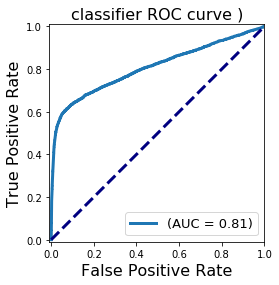

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 6  the class distribution
[205889  82355]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[71717 16525]
 [ 1140  2634]]

   Accuracy: 0.81

   Precision: 0.14

   Recall: 0.70

   F1: 0.23
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.81      0.89     88242
           1       0.14      0.70      0.23      3774

   micro avg       0.81      0.81      0.81     92016
   macro avg       0.56      0.76      0.56     92016
weighted avg       0.95      0.81      0.86     92016

Metric 
 0.70  0.23  0.14  0.81
 0.81


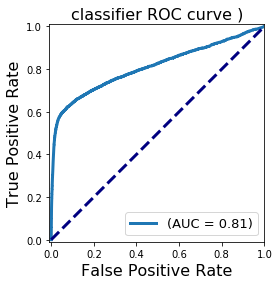

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 8  the class distribution
[205889  82355]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[72927 15315]
 [ 1182  2592]]

   Accuracy: 0.82

   Precision: 0.14

   Recall: 0.69

   F1: 0.24
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.83      0.90     88242
           1       0.14      0.69      0.24      3774

   micro avg       0.82      0.82      0.82     92016
   macro avg       0.56      0.76      0.57     92016
weighted avg       0.95      0.82      0.87     92016

Metric 
 0.69  0.24  0.14  0.82
 0.81


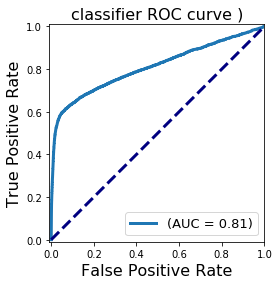

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 10  the class distribution
[205889  82355]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[69345 18897]
 [ 1100  2674]]

   Accuracy: 0.78

   Precision: 0.12

   Recall: 0.71

   F1: 0.21
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.79      0.87     88242
           1       0.12      0.71      0.21      3774

   micro avg       0.78      0.78      0.78     92016
   macro avg       0.55      0.75      0.54     92016
weighted avg       0.95      0.78      0.85     92016

Metric 
 0.71  0.21  0.12  0.78
 0.81


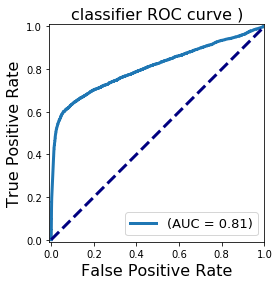

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 12  the class distribution
[205889  82355]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[71319 16923]
 [ 1139  2635]]

   Accuracy: 0.80

   Precision: 0.13

   Recall: 0.70

   F1: 0.23
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.81      0.89     88242
           1       0.13      0.70      0.23      3774

   micro avg       0.80      0.80      0.80     92016
   macro avg       0.56      0.75      0.56     92016
weighted avg       0.95      0.80      0.86     92016

Metric 
 0.70  0.23  0.13  0.80
 0.81


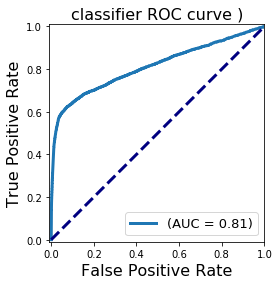

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.4 and neighbor is 14  the class distribution
[205889  82355]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[75661 12581]
 [ 1220  2554]]

   Accuracy: 0.85

   Precision: 0.17

   Recall: 0.68

   F1: 0.27
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.86      0.92     88242
           1       0.17      0.68      0.27      3774

   micro avg       0.85      0.85      0.85     92016
   macro avg       0.58      0.77      0.59     92016
weighted avg       0.95      0.85      0.89     92016

Metric 
 0.68  0.27  0.17  0.85
 0.81


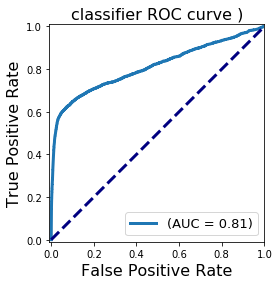

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 2  the class distribution
[205889 123533]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[56299 31943]
 [  849  2925]]

   Accuracy: 0.64

   Precision: 0.08

   Recall: 0.78

   F1: 0.15
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.64      0.77     88242
           1       0.08      0.78      0.15      3774

   micro avg       0.64      0.64      0.64     92016
   macro avg       0.53      0.71      0.46     92016
weighted avg       0.95      0.64      0.75     92016

Metric 
 0.78  0.15  0.08  0.64
 0.81


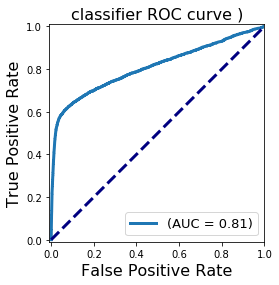

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 4  the class distribution
[205889 123533]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[62051 26191]
 [  938  2836]]

   Accuracy: 0.71

   Precision: 0.10

   Recall: 0.75

   F1: 0.17
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.70      0.82     88242
           1       0.10      0.75      0.17      3774

   micro avg       0.71      0.71      0.71     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.71      0.79     92016

Metric 
 0.75  0.17  0.10  0.71
 0.81


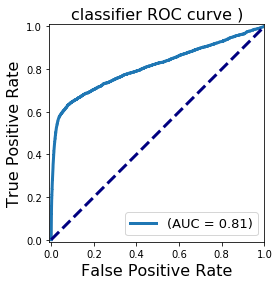

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 6  the class distribution
[205889 123533]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[63815 24427]
 [  979  2795]]

   Accuracy: 0.72

   Precision: 0.10

   Recall: 0.74

   F1: 0.18
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.72      0.83     88242
           1       0.10      0.74      0.18      3774

   micro avg       0.72      0.72      0.72     92016
   macro avg       0.54      0.73      0.51     92016
weighted avg       0.95      0.72      0.81     92016

Metric 
 0.74  0.18  0.10  0.72
 0.81


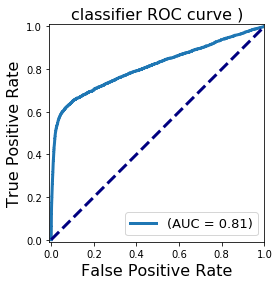

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 8  the class distribution
[205889 123533]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[64228 24014]
 [  998  2776]]

   Accuracy: 0.73

   Precision: 0.10

   Recall: 0.74

   F1: 0.18
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.73      0.84     88242
           1       0.10      0.74      0.18      3774

   micro avg       0.73      0.73      0.73     92016
   macro avg       0.54      0.73      0.51     92016
weighted avg       0.95      0.73      0.81     92016

Metric 
 0.74  0.18  0.10  0.73
 0.81


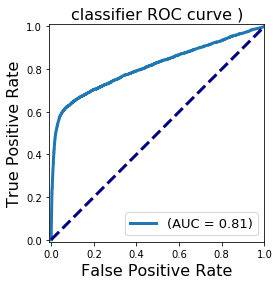

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 10  the class distribution
[205889 123533]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[63059 25183]
 [  961  2813]]

   Accuracy: 0.72

   Precision: 0.10

   Recall: 0.75

   F1: 0.18
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.71      0.83     88242
           1       0.10      0.75      0.18      3774

   micro avg       0.72      0.72      0.72     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.72      0.80     92016

Metric 
 0.75  0.18  0.10  0.72
 0.81


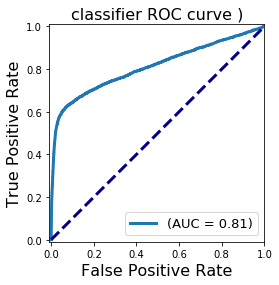

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 12  the class distribution
[205889 123533]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[70666 17576]
 [ 1091  2683]]

   Accuracy: 0.80

   Precision: 0.13

   Recall: 0.71

   F1: 0.22
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.80      0.88     88242
           1       0.13      0.71      0.22      3774

   micro avg       0.80      0.80      0.80     92016
   macro avg       0.56      0.76      0.55     92016
weighted avg       0.95      0.80      0.86     92016

Metric 
 0.71  0.22  0.13  0.80
 0.81


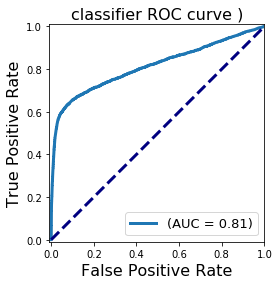

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.6 and neighbor is 14  the class distribution
[205889 123533]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[69501 18741]
 [ 1068  2706]]

   Accuracy: 0.78

   Precision: 0.13

   Recall: 0.72

   F1: 0.21
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.98      0.79      0.88     88242
           1       0.13      0.72      0.21      3774

   micro avg       0.78      0.78      0.78     92016
   macro avg       0.56      0.75      0.54     92016
weighted avg       0.95      0.78      0.85     92016

Metric 
 0.72  0.21  0.13  0.78
 0.81


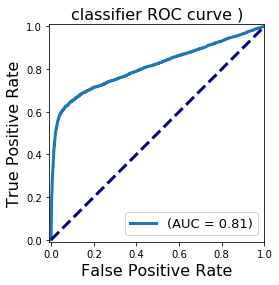

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 2  the class distribution
[205889 164711]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[48532 39710]
 [  725  3049]]

   Accuracy: 0.56

   Precision: 0.07

   Recall: 0.81

   F1: 0.13
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.55      0.71     88242
           1       0.07      0.81      0.13      3774

   micro avg       0.56      0.56      0.56     92016
   macro avg       0.53      0.68      0.42     92016
weighted avg       0.95      0.56      0.68     92016

Metric 
 0.81  0.13  0.07  0.56
 0.81


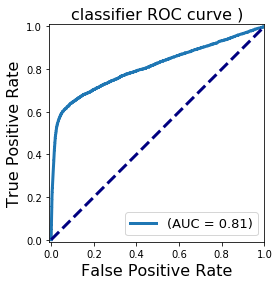

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 4  the class distribution
[205889 164711]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[56133 32109]
 [  829  2945]]

   Accuracy: 0.64

   Precision: 0.08

   Recall: 0.78

   F1: 0.15
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.64      0.77     88242
           1       0.08      0.78      0.15      3774

   micro avg       0.64      0.64      0.64     92016
   macro avg       0.53      0.71      0.46     92016
weighted avg       0.95      0.64      0.75     92016

Metric 
 0.78  0.15  0.08  0.64
 0.81


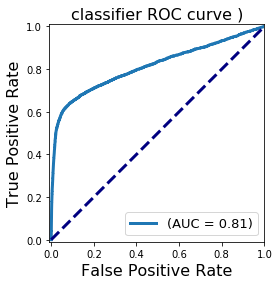

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 6  the class distribution
[205889 164711]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[56787 31455]
 [  850  2924]]

   Accuracy: 0.65

   Precision: 0.09

   Recall: 0.77

   F1: 0.15
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.64      0.78     88242
           1       0.09      0.77      0.15      3774

   micro avg       0.65      0.65      0.65     92016
   macro avg       0.54      0.71      0.47     92016
weighted avg       0.95      0.65      0.75     92016

Metric 
 0.77  0.15  0.09  0.65
 0.81


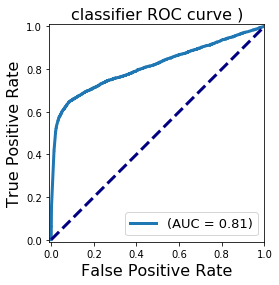

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 8  the class distribution
[205889 164711]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[62039 26203]
 [  938  2836]]

   Accuracy: 0.71

   Precision: 0.10

   Recall: 0.75

   F1: 0.17
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.70      0.82     88242
           1       0.10      0.75      0.17      3774

   micro avg       0.71      0.71      0.71     92016
   macro avg       0.54      0.73      0.50     92016
weighted avg       0.95      0.71      0.79     92016

Metric 
 0.75  0.17  0.10  0.71
 0.81


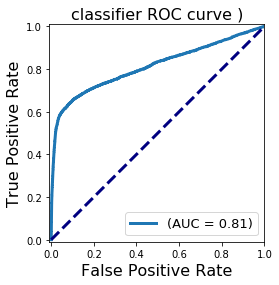

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 10  the class distribution
[205889 164711]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[56060 32182]
 [  812  2962]]

   Accuracy: 0.64

   Precision: 0.08

   Recall: 0.78

   F1: 0.15
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.64      0.77     88242
           1       0.08      0.78      0.15      3774

   micro avg       0.64      0.64      0.64     92016
   macro avg       0.54      0.71      0.46     92016
weighted avg       0.95      0.64      0.75     92016

Metric 
 0.78  0.15  0.08  0.64
 0.82


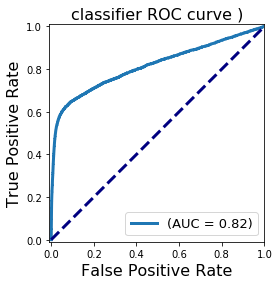

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 12  the class distribution
[205889 164711]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[58821 29421]
 [  881  2893]]

   Accuracy: 0.67

   Precision: 0.09

   Recall: 0.77

   F1: 0.16
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.67      0.80     88242
           1       0.09      0.77      0.16      3774

   micro avg       0.67      0.67      0.67     92016
   macro avg       0.54      0.72      0.48     92016
weighted avg       0.95      0.67      0.77     92016

Metric 
 0.77  0.16  0.09  0.67
 0.81


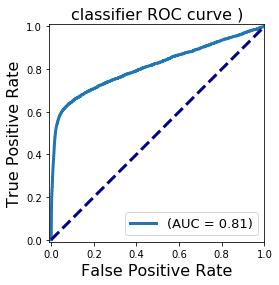

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 0.8 and neighbor is 14  the class distribution
[205889 164711]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[56919 31323]
 [  844  2930]]

   Accuracy: 0.65

   Precision: 0.09

   Recall: 0.78

   F1: 0.15
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.65      0.78     88242
           1       0.09      0.78      0.15      3774

   micro avg       0.65      0.65      0.65     92016
   macro avg       0.54      0.71      0.47     92016
weighted avg       0.95      0.65      0.75     92016

Metric 
 0.78  0.15  0.09  0.65
 0.81


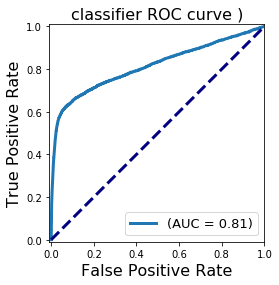

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 2  the class distribution
[205889 205889]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[41678 46564]
 [  602  3172]]

   Accuracy: 0.49

   Precision: 0.06

   Recall: 0.84

   F1: 0.12
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.47      0.64     88242
           1       0.06      0.84      0.12      3774

   micro avg       0.49      0.49      0.49     92016
   macro avg       0.52      0.66      0.38     92016
weighted avg       0.95      0.49      0.62     92016

Metric 
 0.84  0.12  0.06  0.49
 0.81


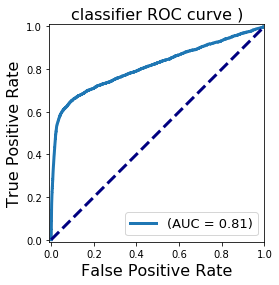

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 4  the class distribution
[205889 205889]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[44050 44192]
 [  628  3146]]

   Accuracy: 0.51

   Precision: 0.07

   Recall: 0.83

   F1: 0.12
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.50      0.66     88242
           1       0.07      0.83      0.12      3774

   micro avg       0.51      0.51      0.51     92016
   macro avg       0.53      0.67      0.39     92016
weighted avg       0.95      0.51      0.64     92016

Metric 
 0.83  0.12  0.07  0.51
 0.81


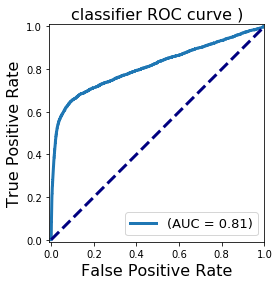

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 6  the class distribution
[205889 205889]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[43548 44694]
 [  610  3164]]

   Accuracy: 0.51

   Precision: 0.07

   Recall: 0.84

   F1: 0.12
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.49      0.66     88242
           1       0.07      0.84      0.12      3774

   micro avg       0.51      0.51      0.51     92016
   macro avg       0.53      0.67      0.39     92016
weighted avg       0.95      0.51      0.64     92016

Metric 
 0.84  0.12  0.07  0.51
 0.81


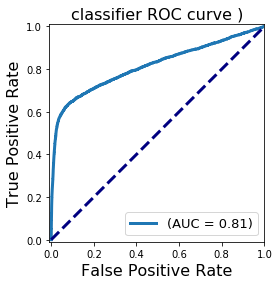

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 8  the class distribution
[205889 205889]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[52444 35798]
 [  754  3020]]

   Accuracy: 0.60

   Precision: 0.08

   Recall: 0.80

   F1: 0.14
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.59      0.74     88242
           1       0.08      0.80      0.14      3774

   micro avg       0.60      0.60      0.60     92016
   macro avg       0.53      0.70      0.44     92016
weighted avg       0.95      0.60      0.72     92016

Metric 
 0.80  0.14  0.08  0.60
 0.82


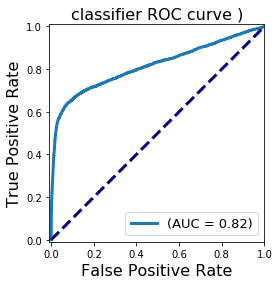

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 10  the class distribution
[205889 205889]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[49982 38260]
 [  729  3045]]

   Accuracy: 0.58

   Precision: 0.07

   Recall: 0.81

   F1: 0.14
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.57      0.72     88242
           1       0.07      0.81      0.14      3774

   micro avg       0.58      0.58      0.58     92016
   macro avg       0.53      0.69      0.43     92016
weighted avg       0.95      0.58      0.70     92016

Metric 
 0.81  0.14  0.07  0.58
 0.81


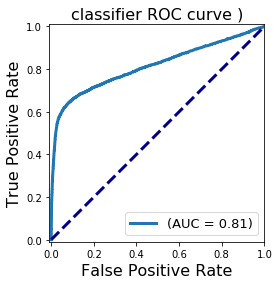

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 12  the class distribution
[205889 205889]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[48463 39779]
 [  724  3050]]

   Accuracy: 0.56

   Precision: 0.07

   Recall: 0.81

   F1: 0.13
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.55      0.71     88242
           1       0.07      0.81      0.13      3774

   micro avg       0.56      0.56      0.56     92016
   macro avg       0.53      0.68      0.42     92016
weighted avg       0.95      0.56      0.68     92016

Metric 
 0.81  0.13  0.07  0.56
 0.81


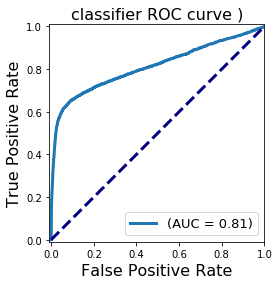

---------------------------------------------------------------------------------------------------
When the ratio between the majority and the minority is 1 and neighbor is 14  the class distribution
[205889 205889]
--------------------------------------------Gradient-Boosted Tree-------------------------------------
---Confusion Matrix---
 [[52058 36184]
 [  737  3037]]

   Accuracy: 0.60

   Precision: 0.08

   Recall: 0.80

   F1: 0.14
---Classification Report---

   
               precision    recall  f1-score   support

       not 1       0.99      0.59      0.74     88242
           1       0.08      0.80      0.14      3774

   micro avg       0.60      0.60      0.60     92016
   macro avg       0.53      0.70      0.44     92016
weighted avg       0.95      0.60      0.71     92016

Metric 
 0.80  0.14  0.08  0.60
 0.82


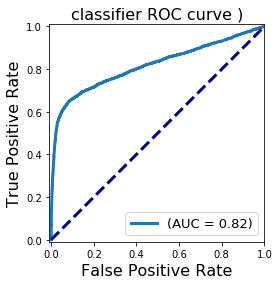

In [72]:
for i in [0.2,0.4,0.6,0.8,1]:
    for k in range(2,16,2):
        print("---------------------------------------------------------------------------------------------------")
        print("When the ratio between the majority and the minority is", i,"and neighbor is",k," the class distribution")
        X_resampled, y_resampled=smote_training_size_k(X=X_train,y=y_train,pro=i,k=k)
        print(np.bincount(y_resampled.astype(int)))
        print("--------------------------------------------Gradient-Boosted Tree-------------------------------------")
        Gradient_Boosting_fit(X_resampled, y_resampled,X_test,y_test)        